## Importing the boat's CAN BUS data


In [39]:
import vaex
import numpy as np
import pandas as pd
from pandas import Timestamp
import matplotlib.pyplot as plt
from pytz import timezone

import matplotlib.style as mplstyle
mplstyle.use('fast')

input_path = "/home/joaoantoniocardoso/workspace_TCC/repo/code/data/final/"
input_filename = "unified_monotonic_data_1s.hdf5"
# input_filename = "unified_monotonic_data_100ms.hdf5"
df = vaex.open(input_path + input_filename).to_pandas_df()

# Localize the timestamp
tzinfo = timezone("America/Sao_Paulo")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["timestamp"] = df["timestamp"].dt.tz_localize(timezone("UTC"))
df["timestamp"] = df["timestamp"].dt.tz_convert(tzinfo)
df.set_index('timestamp', inplace=True, drop=True)
df


MCC19_1__MEASUREMENTS__SIGNATURE  \
timestamp                                                     
2020-01-29 11:56:53-03:00                             225.0   
2020-01-29 11:56:54-03:00                             225.0   
2020-01-29 11:56:55-03:00                             225.0   
2020-01-29 11:56:56-03:00                             225.0   
2020-01-29 11:56:57-03:00                             225.0   
...                                                     ...   
2020-02-02 13:25:25-03:00                             225.0   
2020-02-02 13:25:26-03:00                             225.0   
2020-02-02 13:25:27-03:00                             225.0   
2020-02-02 13:25:28-03:00                             225.0   
2020-02-02 13:25:29-03:00                             225.0   

                           MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE  \
timestamp                                                          
2020-01-29 11:56:53-03:00                              39.396343   
2020-01-29 11:56:54-03:00                              39.399273   
2020-01-29 11:56:55-03:00                              39.383572   
2020-01-29 11:56:56-03:00                              39.397011   
2020-01-29 11:56:57-03:00                              39.390011   
...                                                          ...   
2020-02-02 13:25:25-03:00                              38.109543   
2020-02-02 13:25:26-03:00                              38.522369   
2020-02-02 13:25:27-03:00                              38.113560   
2020-02-02 13:25:28-03:00                              38.112896   
2020-02-02 13:25:29-03:00                              38.115383   

                           MCC19_1__MEASUREMENTS__INPUT_CURRENT  \
timestamp                                                         
2020-01-29 11:56:53-03:00                              0.000000   
2020-01-29 11:56:54-03:00                              0.000000   
2020-01-29 11:56:55-03:00                              0.000000   
2020-01-29 11:56:56-03:00                              0.000000   
2020-01-29 11:56:57-03:00                              0.000000   
...                                                         ...   
2020-02-02 13:25:25-03:00                              0.001291   
2020-02-02 13:25:26-03:00                              0.005264   
2020-02-02 13:25:27-03:00                              0.003661   
2020-02-02 13:25:28-03:00                              0.002883   
2020-02-02 13:25:29-03:00                              0.000000   

                           MCC19_1__MEASUREMENTS__INPUT_VOLTAGE  \
timestamp                                                         
2020-01-29 11:56:53-03:00                              0.000000   
2020-01-29 11:56:54-03:00                              0.160266   
2020-01-29 11:56:55-03:00                              0.091235   
2020-01-29 11:56:56-03:00                              0.104958   
2020-01-29 11:56:57-03:00                              0.001667   
...                                                         ...   
2020-02-02 13:25:25-03:00                              0.074959   
2020-02-02 13:25:26-03:00                              0.475321   
2020-02-02 13:25:27-03:00                              0.077154   
2020-02-02 13:25:28-03:00                              0.091004   
2020-02-02 13:25:29-03:00                              0.075395   

                           MCC19_1__MEASUREMENTS__DT  \
timestamp                                              
2020-01-29 11:56:53-03:00                   0.205811   
2020-01-29 11:56:54-03:00                   0.414806   
2020-01-29 11:56:55-03:00                   0.795847   
2020-01-29 11:56:56-03:00                   0.336668   
2020-01-29 11:56:57-03:00                   0.215064   
...                                              ...   
2020-02-02 13:25:25-03:00                   0.582422   
2020-02-02 13:25:26-03:00                   0.364479   
2020-02-02 13:25:2

## Transforming the boat's CAN data into boat's circuit data


In [40]:
[print(c) for c in sorted(df.columns)][0]


MAB19__PUMPS__PUMPS
MAB19__PUMPS__SIGNATURE
MAB19__STATE__ERROR
MAB19__STATE__SIGNATURE
MAB19__STATE__STATE
MAM19__MOTOR__D
MAM19__MOTOR__I
MAM19__MOTOR__SIGNATURE
MAM19__STATE__ERROR
MAM19__STATE__SIGNATURE
MAM19__STATE__STATE
MCB19_1__MEASUREMENTS__DT
MCB19_1__MEASUREMENTS__INPUT_VOLTAGE
MCB19_1__MEASUREMENTS__OUTPUT_CURRENT
MCB19_1__MEASUREMENTS__OUTPUT_VOLTAGE
MCB19_1__MEASUREMENTS__SIGNATURE
MCB19_1__STATE__CONTROL
MCB19_1__STATE__SIGNATURE
MCB19_1__STATE__STATE
MCB19_2__MEASUREMENTS__DT
MCB19_2__MEASUREMENTS__INPUT_VOLTAGE
MCB19_2__MEASUREMENTS__OUTPUT_CURRENT
MCB19_2__MEASUREMENTS__OUTPUT_VOLTAGE
MCB19_2__MEASUREMENTS__SIGNATURE
MCB19_2__STATE__CONTROL
MCB19_2__STATE__SIGNATURE
MCB19_2__STATE__STATE
MCC19_1__MEASUREMENTS__DT
MCC19_1__MEASUREMENTS__INPUT_CURRENT
MCC19_1__MEASUREMENTS__INPUT_VOLTAGE
MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE
MCC19_1__MEASUREMENTS__SIGNATURE
MCC19_1__STATE__CONTROL
MCC19_1__STATE__SIGNATURE
MCC19_1__STATE__STATE
MCC19_2__MEASUREMENTS__DT
MCC19_2__MEASUR

Ignore columns we are not interested in

In [41]:
ignored = [
    "MIN",
    "MAX",
    "STATE",
    "ERROR",
    "SIGNATURE",
    "MCS19",
    "MCB19",
    "MAB19",
    "PUMPS",
    "MOTOR__I"
]

columns = [c for c in sorted(df.columns) if all(x not in c for x in ignored)]
columns

['MAM19__MOTOR__D',
 'MCC19_1__MEASUREMENTS__DT',
 'MCC19_1__MEASUREMENTS__INPUT_CURRENT',
 'MCC19_1__MEASUREMENTS__INPUT_VOLTAGE',
 'MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE',
 'MCC19_2__MEASUREMENTS__DT',
 'MCC19_2__MEASUREMENTS__INPUT_CURRENT',
 'MCC19_2__MEASUREMENTS__INPUT_VOLTAGE',
 'MCC19_2__MEASUREMENTS__OUTPUT_VOLTAGE',
 'MCC19_3__MEASUREMENTS__DT',
 'MCC19_3__MEASUREMENTS__INPUT_CURRENT',
 'MCC19_3__MEASUREMENTS__INPUT_VOLTAGE',
 'MCC19_3__MEASUREMENTS__OUTPUT_VOLTAGE',
 'MCC19_4__MEASUREMENTS__DT',
 'MCC19_4__MEASUREMENTS__INPUT_CURRENT',
 'MCC19_4__MEASUREMENTS__INPUT_VOLTAGE',
 'MCC19_4__MEASUREMENTS__OUTPUT_VOLTAGE',
 'MIC19__MCS__BOAT_ON',
 'MIC19__MOTOR__D',
 'MIC19__MOTOR__MOTOR',
 'MSC19_1__ADC__AVG',
 'MSC19_2__ADC__AVG',
 'MSC19_3__ADC__AVG',
 'MSC19_4__ADC__AVG',
 'MSC19_5__ADC__AVG',
 'MSWI19__MCS__BOAT_ON',
 'MSWI19__MOTOR__D',
 'MSWI19__MOTOR__MOTOR',
 'MT19__RPM__AVG',
 'solcast_AirTemp',
 'solcast_Azimuth',
 'solcast_CloudOpacity',
 'solcast_DewpointTemp',
 'solc

### List of each race

In [42]:
events = [
    {
        'name': '00. Prólogo',
        'start': Timestamp(year=2020, month=1, day=29, hour=10, minute=43, second=15, tzinfo=tzinfo),
        'end': Timestamp(year=2020, month=1, day=29, hour=11, minute=32, second=20, tzinfo=tzinfo),
    },
    {
        'name': '01. Curta',
        'start': Timestamp(year=2020, month=1, day=29, hour=13, minute=51, second=59, tzinfo=tzinfo),
        'end': Timestamp(year=2020, month=1, day=29, hour=15, minute=5, second=32, tzinfo=tzinfo),
    },
    {
        'name': '02. Longa',
        'start': Timestamp(year=2020, month=1, day=30, hour=11, minute=16, second=45, tzinfo=tzinfo),
        'end': Timestamp(year=2020, month=1, day=30, hour=14, minute=55, second=30, tzinfo=tzinfo),
    },
    {
        'name': '03. Revezamento',
        'start': Timestamp(year=2020, month=1, day=31, hour=11, minute=23, second=23, tzinfo=tzinfo),
        'end': Timestamp(year=2020, month=1, day=31, hour=12, minute=27, second=23, tzinfo=tzinfo),
    },
    {
        'name': '04. Curta',
        'start': Timestamp(year=2020, month=2, day=1, hour=10, minute=15, second=15, tzinfo=tzinfo),
        'end': Timestamp(year=2020, month=2, day=1, hour=11, minute=37, second=28, tzinfo=tzinfo),
    },
    {
        'name': '05. Curta',
        'start': Timestamp(year=2020, month=2, day=1, hour=13, minute=15, second=9, tzinfo=tzinfo),
        'end': Timestamp(year=2020, month=2, day=1, hour=13, minute=37, second=28, tzinfo=tzinfo),
    },
    {
        'name': '07. Sprint',
        'start': Timestamp(year=2020, month=2, day=2, hour=12, minute=5, second=27, tzinfo=tzinfo),
        'end': Timestamp(year=2020, month=2, day=2, hour=12, minute=8, second=9, tzinfo=tzinfo),
    },
]

events = pd.DataFrame(events).set_index(['name'])

## Checking the data on each column

In [43]:
# from matplotlib.dates import DateFormatter


# fig, ax = plt.subplots(len(columns), 1, figsize=(20, 1 * len(columns)), sharex=True)

# # Plot each column
# for i, column in enumerate(columns):
#     ax[i].plot(df.index, df[column], label=column.replace('__', '\n'), zorder=1)
#     ax[i].legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)

#     # Plot vertical lines for each event
#     for event in events:
#         ax[i].axvline(event['start'], ymin=-0.1, ymax=1.1, linestyle='--', color='gray', alpha=0.7, zorder=0, clip_on=False)
#         ax[i].axvline(event['end'], ymin=-0.1, ymax=1.1, linestyle='--', color='gray', alpha=0.7, zorder=0, clip_on=False)

#         if i == 0:
#             ax[i].annotate(event['name'], xy=(event['end'], 1.02), xytext=(event['start'], 1.1),
#                            arrowprops=dict(facecolor='black', arrowstyle='->'))

# # Configure X axis
# plt.xlabel('Timestamp')
# plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M:%S', tz=tzinfo))

# plt.tight_layout()
# plt.show()


### Selecting the data of interest

Here we select the data of interest, while renaming the columns to, instead of having the subsystem name, having a name that represents the meaning of the data for the global system.

In [44]:
def col(module: str, topic: str, byte: str) -> str:
    separator = "__"
    return separator.join([module, topic, byte])


# Module name to system variable name mapper
number_of_mppts = 4
number_of_battery_cells = 3
system_data = {
    "Battery Pack Voltage": col("MCS19", "BAT", "AVG"),
    "Battery Cell Voltage": [
        col(f"MSC19_{i + 1}", "ADC", "AVG") for i in range(number_of_battery_cells)
    ],
    "Battery Input Current": col("MSC19_4", "ADC", "AVG"),
    "Battery Output Current": col("MSC19_5", "ADC", "AVG"),
    "Pilot Duty Cycle": col("MSWI19", "MOTOR", "D"),
    "Pilot Motor On": col("MIC19", "MOTOR", "MOTOR"),
    "Pilot Boat On": col("MIC19", "MCS", "BOAT_ON"),
    "ESC Duty Cycle": col("MAM19", "MOTOR", "D"),
    "Motor Angular Speed": col("MT19", "RPM", "AVG"),
    "MPPT Input Voltage": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "INPUT_VOLTAGE")
        for i in range(number_of_mppts)
    ],
    "MPPT Output Voltage": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "OUTPUT_VOLTAGE")
        for i in range(number_of_mppts)
    ],
    "MPPT Input Current": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "INPUT_CURRENT")
        for i in range(number_of_mppts)
    ],
    "MPPT Duty Cycle": [
        col(f"MCC19_{i + 1}", "MEASUREMENTS", "DT") for i in range(number_of_mppts)
    ],
}
system_data


{'Battery Pack Voltage': 'MCS19__BAT__AVG',
 'Battery Cell Voltage': ['MSC19_1__ADC__AVG',
  'MSC19_2__ADC__AVG',
  'MSC19_3__ADC__AVG'],
 'Battery Input Current': 'MSC19_4__ADC__AVG',
 'Battery Output Current': 'MSC19_5__ADC__AVG',
 'Pilot Duty Cycle': 'MSWI19__MOTOR__D',
 'Pilot Motor On': 'MIC19__MOTOR__MOTOR',
 'Pilot Boat On': 'MIC19__MCS__BOAT_ON',
 'ESC Duty Cycle': 'MAM19__MOTOR__D',
 'Motor Angular Speed': 'MT19__RPM__AVG',
 'MPPT Input Voltage': ['MCC19_1__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_2__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_3__MEASUREMENTS__INPUT_VOLTAGE',
  'MCC19_4__MEASUREMENTS__INPUT_VOLTAGE'],
 'MPPT Output Voltage': ['MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_2__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_3__MEASUREMENTS__OUTPUT_VOLTAGE',
  'MCC19_4__MEASUREMENTS__OUTPUT_VOLTAGE'],
 'MPPT Input Current': ['MCC19_1__MEASUREMENTS__INPUT_CURRENT',
  'MCC19_2__MEASUREMENTS__INPUT_CURRENT',
  'MCC19_3__MEASUREMENTS__INPUT_CURRENT',
  'MCC19_4__MEASUREMENTS__IN

## Solve the boat circuit

### ESC vs Pilot Duty Cycle
There is an overflow in the ESC Duty Cycle, and for 1s, the dynamics are not very different, so we'll consider both equal.

In [45]:
start, end = events.loc['03. Revezamento']
start = start.tz_convert(None)
end = end.tz_convert(None)

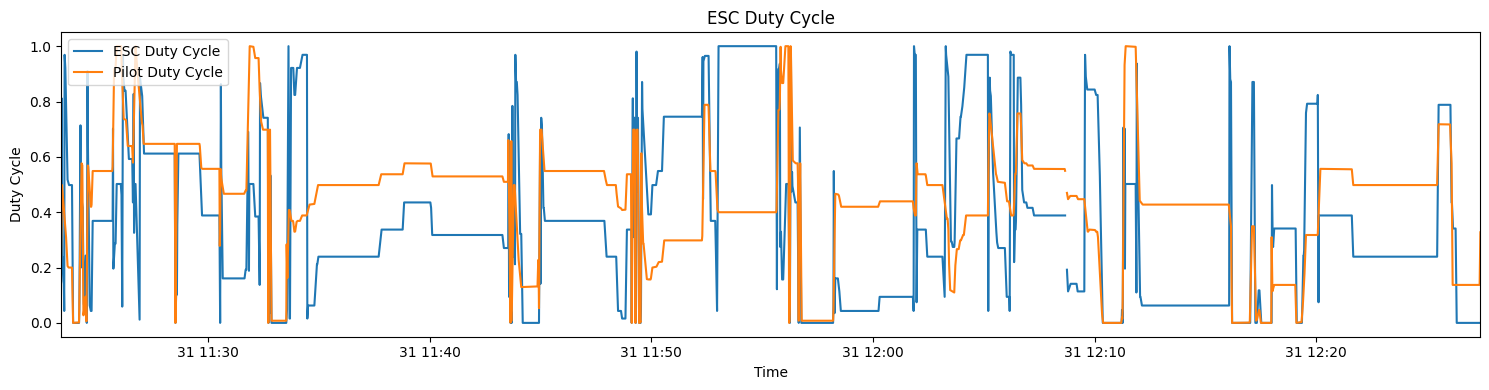

In [46]:
plt.figure(figsize=(15,4))
plt.title('ESC Duty Cycle')
plt.plot(df.index, df[system_data['ESC Duty Cycle']], label='ESC Duty Cycle')
plt.plot(df.index, df[system_data['Pilot Duty Cycle']], label='Pilot Duty Cycle')
plt.xlim([start, end])
plt.xlabel('Time')
plt.ylabel('Duty Cycle')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

df[system_data['ESC Duty Cycle']] = df[system_data['Pilot Duty Cycle']]

### Battery Voltage

We want the battery pack voltage, but we have two problems:
1. The cells sensors (`MSC19_1`, `MSC19_2` and `MSC19_3`) are noisy and sometimes faulty due to bad contacts. 
2. In the other hand, the pack sensor from `MCS19` is uncallibrated.

To deal with it, we can callibrate `MCS19` based on the average of the sum of the cell sensors:

0.07528552


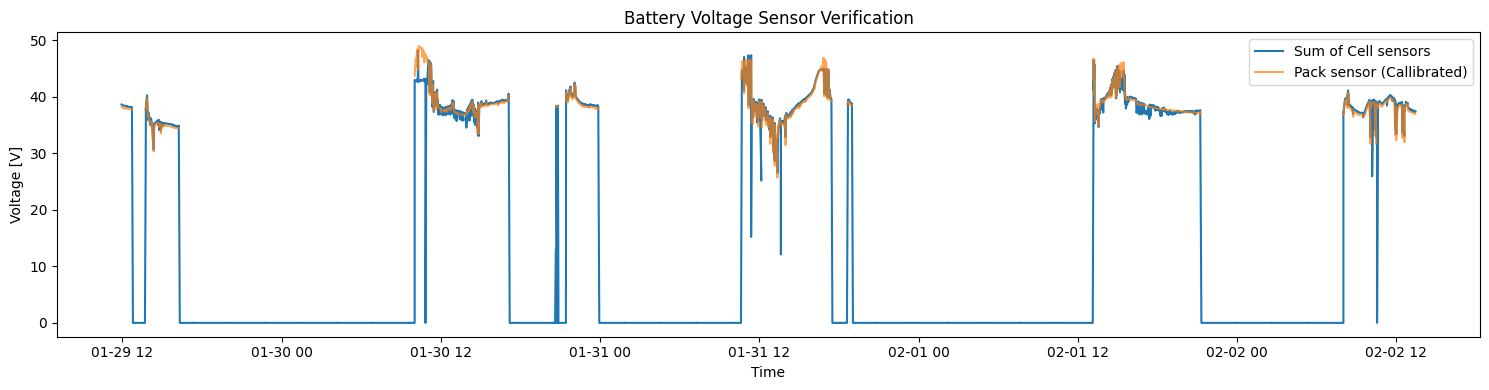

In [47]:
a = np.nansum(df[system_data['Battery Cell Voltage']].dropna().to_numpy(), axis=1)
b = df[system_data['Battery Pack Voltage']].dropna().to_numpy()
k = a.mean() / b.mean()
df[system_data['Battery Pack Voltage']] = df[system_data['Battery Pack Voltage']].apply(lambda x: x * k if not pd.isna(x) else x)

print(k)

plt.figure(figsize=(15,4))
plt.title('Battery Voltage Sensor Verification')
plt.plot(df.index, np.nansum(df[system_data['Battery Cell Voltage']].to_numpy(), axis=1), label='Sum of Cell sensors')
plt.plot(df.index, df[system_data['Battery Pack Voltage']], alpha=0.7, label='Pack sensor (Callibrated)')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Voltage [V]')
plt.tight_layout()
plt.show()

### MPPTs Current

The current of the MPPTs is in the wrong scale (10x bigger than it should), so we fix it by dividing each MPPT Input Current data by 10.

In [48]:
for current in system_data['MPPT Input Current']:
    df[current] /= 10

### MPPTs Power

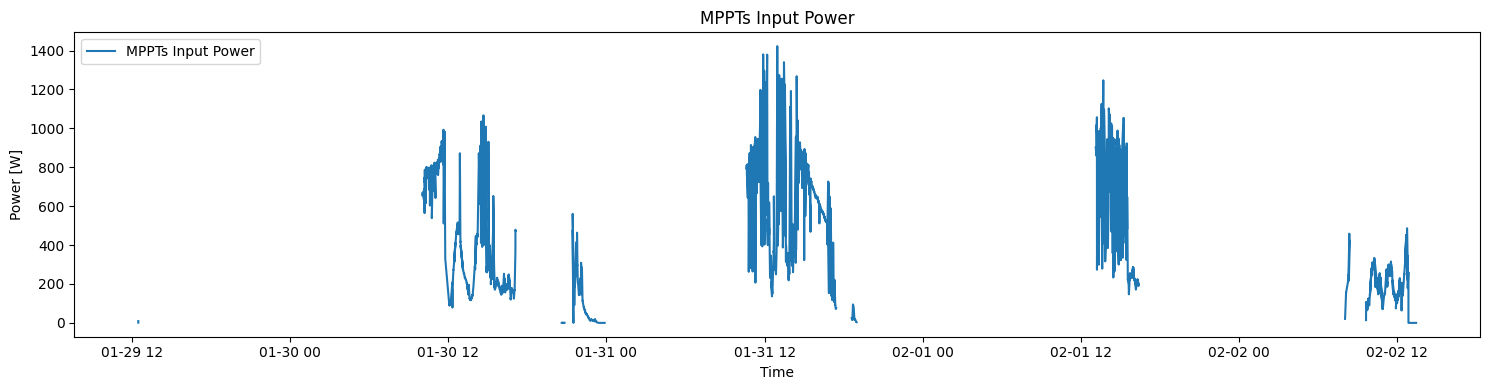

In [49]:
system_data['MPPT Input Power'] = [f'MCC19_{1+i}__COMPUTATIONS__INPUT_POWER' for i in range(len(system_data['MPPT Input Voltage']))]

for i, (current, voltage) in enumerate(zip(system_data['MPPT Input Current'], system_data['MPPT Input Voltage'])):
    df[system_data['MPPT Input Power'][i]] = df[current] * df[voltage]

system_data['MPPTs Input Power'] = 'MPPTs Input Power'
df[system_data['MPPTs Input Power']] = df[system_data['MPPT Input Power']].sum(axis=1, skipna=False)

plt.figure(figsize=(15,4))
plt.title('MPPTs Input Power')
plt.plot(df.index, df[system_data['MPPTs Input Power']], label='MPPTs Input Power')
plt.xlabel('Time')
plt.ylabel('Power [W]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Estimated MPPTs output current


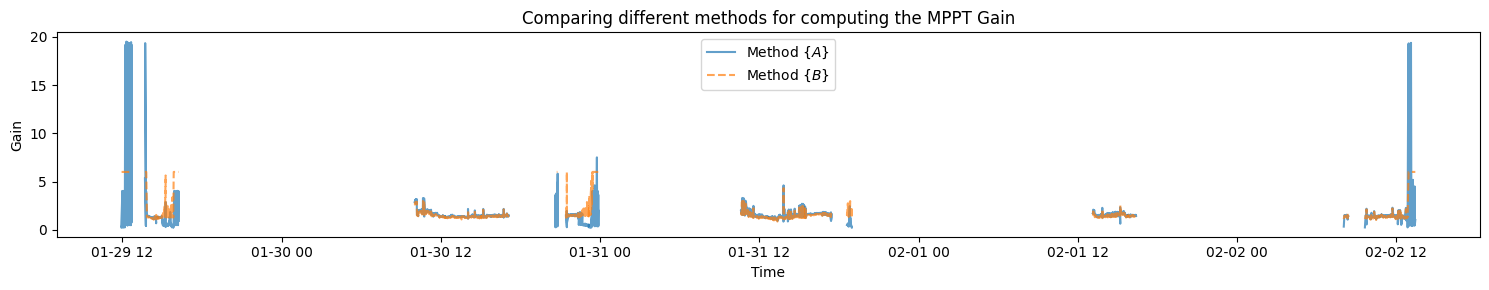

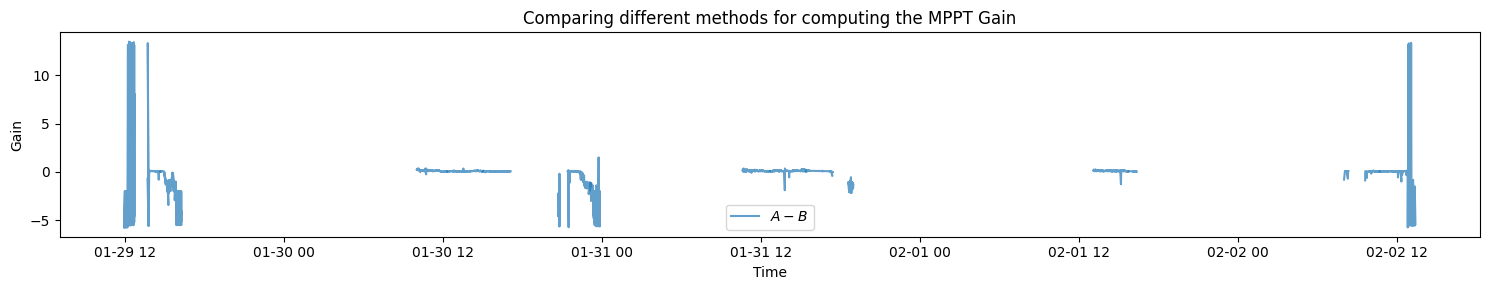

In [50]:
i = 0

D = df[system_data['MPPT Duty Cycle'][i]]
M_A = D / (1 - D)

M_B = df[system_data['Battery Pack Voltage']] / df[system_data['MPPT Input Voltage'][i]]
M_B = M_B.clip(0, 6)

plt.figure(figsize=(15,3))
plt.title('Comparing different methods for computing the MPPT Gain')
plt.plot(M_A, label='Method {$A$}', alpha=0.7)
plt.plot(M_B, '--', label='Method {$B$}', alpha=0.7)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Gain')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,3))
plt.title('Comparing different methods for computing the MPPT Gain')
plt.plot(M_A - M_B, label='${A - B}$', alpha=0.7)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Gain')
plt.tight_layout()
plt.show()

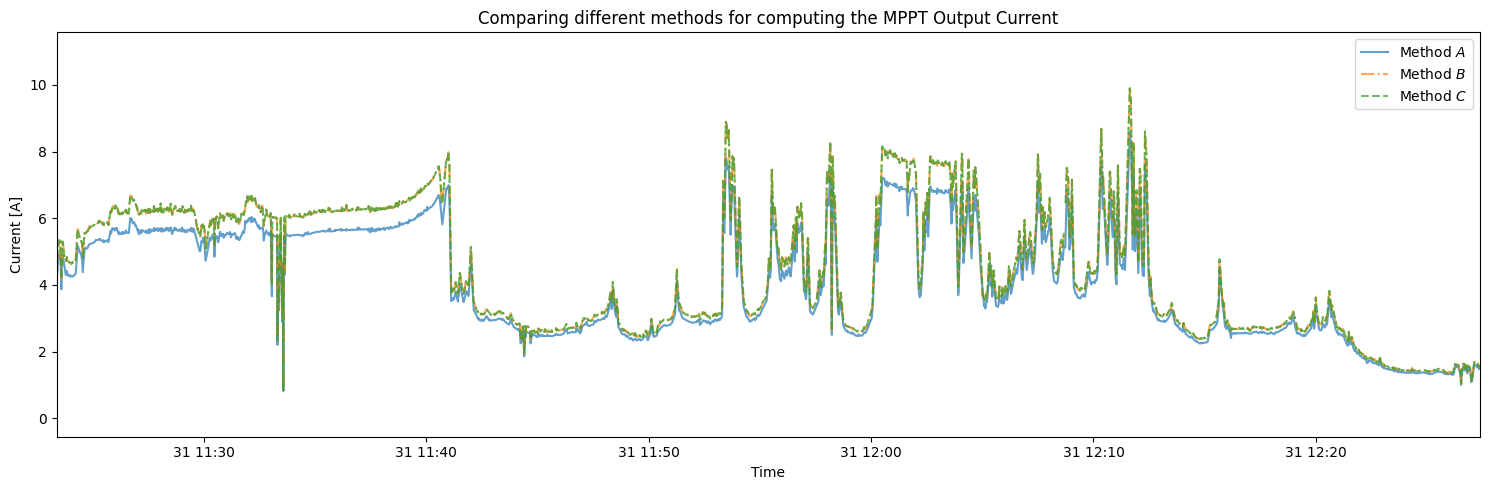

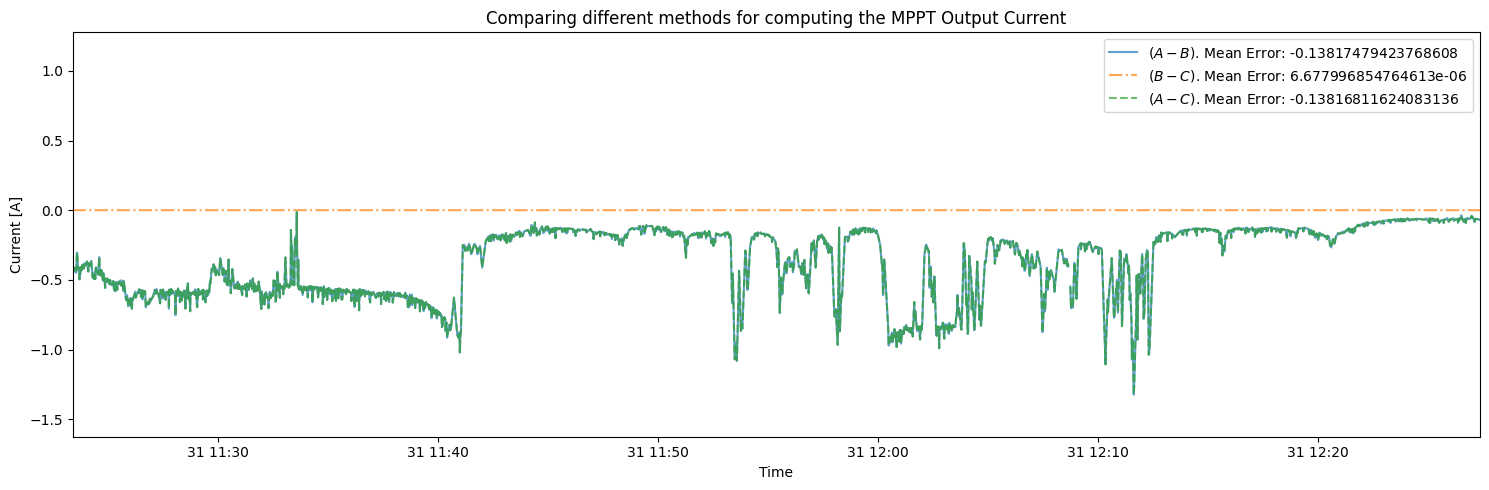

In [51]:
Ii = df[system_data['MPPT Input Current'][i]]
Io_A = Ii / M_A

Ii = df[system_data['MPPT Input Current'][i]]
Io_B = Ii / M_B

# Considering 100% efficiency:
#   Pi = Po
#   Io = Pi / Vo
Pi = df[system_data['MPPT Input Power'][i]]
Vo = df[system_data['Battery Pack Voltage']]
Io_C = Pi / Vo

plt.figure(figsize=(15,5))
plt.title('Comparing different methods for computing the MPPT Output Current')
plt.plot(Io_A, label='Method $A$', alpha=0.7)
plt.plot(Io_B, '-.', label='Method $B$', alpha=0.7)
plt.plot(Io_C, '--', label='Method $C$', alpha=0.7)
plt.xlim([start, end])
plt.legend()
plt.xlabel('Time')
plt.ylabel('Current [A]')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,5))
plt.title('Comparing different methods for computing the MPPT Output Current')
plt.plot(Io_A - Io_B, label=f'$(A - B)$. Mean Error: {(Io_A - Io_B).mean()}', alpha=0.7)
plt.plot(Io_B - Io_C, '-.', label=f'$(B - C)$. Mean Error: {(Io_B - Io_C).mean()}', alpha=0.7)
plt.plot(Io_A - Io_C, '--', label=f'$(A - C)$. Mean Error: {(Io_A - Io_C).mean()}', alpha=0.7)
plt.xlim([start, end])
plt.legend()
plt.xlabel('Time')
plt.ylabel('Current [A]')
plt.tight_layout()
plt.show()

Comparing above methods, we can conclude that B and C agrees, while A (using the converter's gain equation) seems to deviate. Since we know that the efficiency must be below 100%, we choose method A.

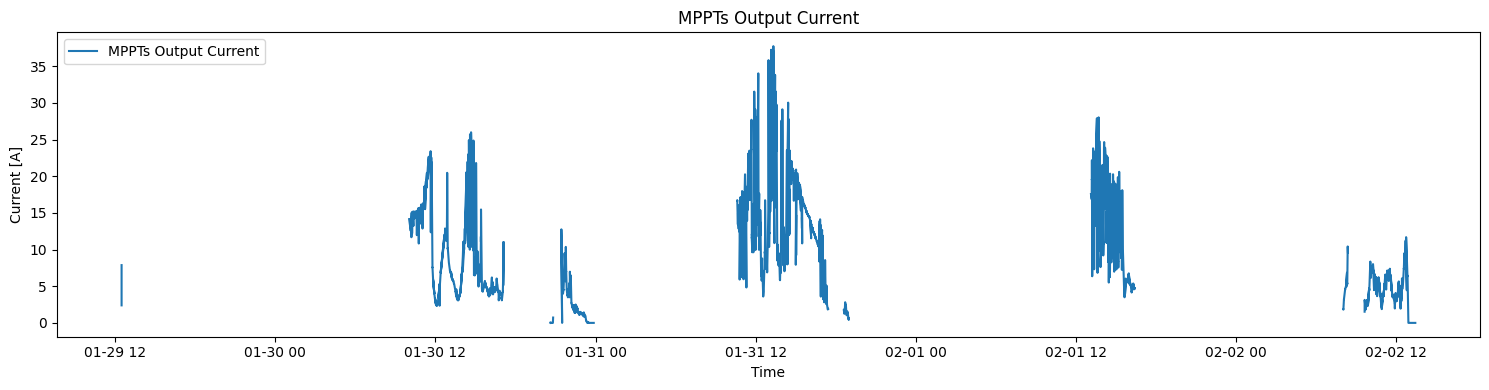

In [52]:
system_data['MPPT Output Current'] = [f'MCC19_{1+i}__COMPUTATIONS__OUTPUT_CURRENT' for i in range(len(system_data['MPPT Input Current']))]

# Method A
for i, (current, duty_cycle) in enumerate(zip(system_data['MPPT Input Current'], system_data['MPPT Duty Cycle'])):
    M = df[duty_cycle] / (1 -df[duty_cycle])
    df[system_data['MPPT Output Current'][i]] = df[current] / M

# # Method B
# for i, (current, voltage) in enumerate(zip(system_data['MPPT Input Current'], system_data['MPPT Input Voltage'])):
#     M = df[system_data['Battery Pack Voltage']] / df[voltage]
#     df[system_data['MPPT Output Current'][i]] = df[current] / M

# # Method C:
# for i, (power, voltage) in enumerate(zip(system_data['MPPT Input Power'], system_data['MPPT Output Voltage'])):
#     df[system_data['MPPT Output Current'][i]] = df[power] / df[voltage]

system_data['MPPTs Output Current'] = 'MPPTs Output Current'
df[system_data['MPPTs Output Current']] = df[system_data['MPPT Output Current']].sum(axis=1, skipna=False)

plt.figure(figsize=(15,4))
plt.title('MPPTs Output Current')
plt.plot(df.index, df[system_data['MPPTs Output Current']], label='MPPTs Output Current')
plt.xlabel('Time')
plt.ylabel('Current [A]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### MPPTs Output Power

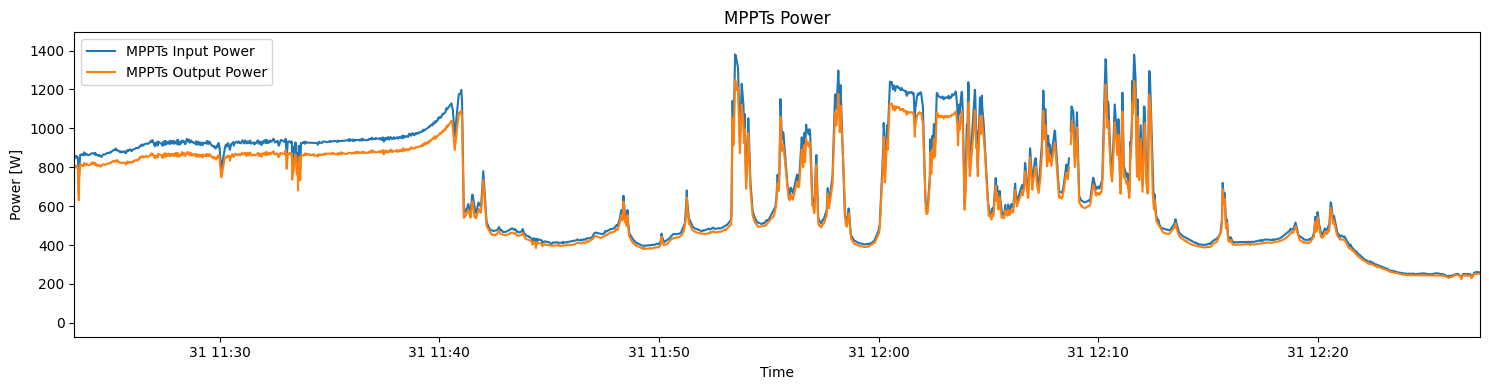

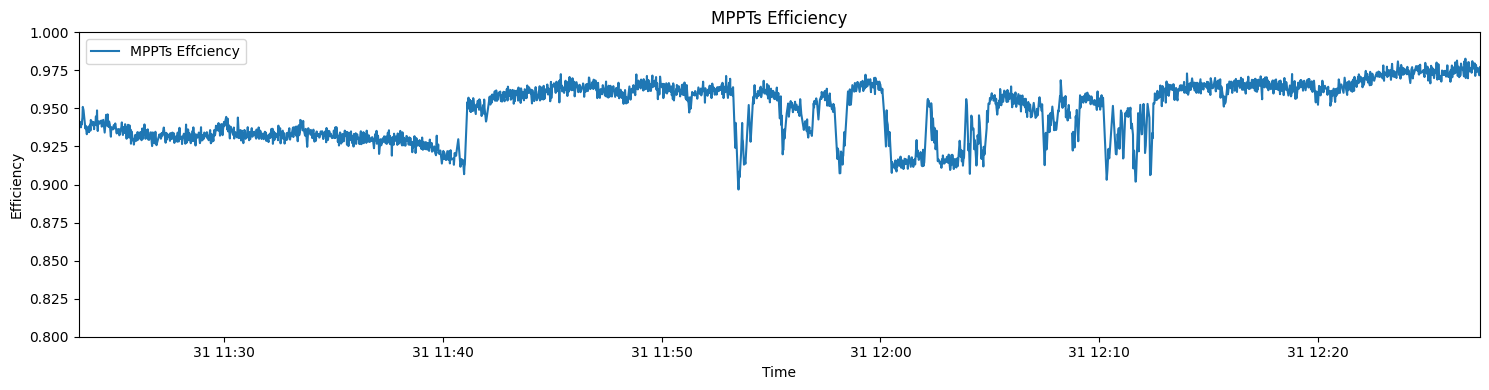

In [53]:
system_data['MPPT Output Power'] = [f'MCC19_{1+i}__COMPUTATIONS__OUTPUT_POWER' for i in range(len(system_data['MPPT Input Current']))]

for i, (current, voltage) in enumerate(zip(system_data['MPPT Output Current'], system_data['MPPT Output Voltage'])):
    df[system_data['MPPT Output Power'][i]] = df[current] * df[voltage]

system_data['MPPTs Output Power'] = 'MPPTs Output Power'
df[system_data['MPPTs Output Power']] = df[system_data['MPPT Output Power']].sum(axis=1, skipna=False)

plt.figure(figsize=(15,4))
plt.title('MPPTs Power')
plt.plot(df.index, df[system_data['MPPTs Input Power']], label='MPPTs Input Power')
plt.plot(df.index, df[system_data['MPPTs Output Power']], label='MPPTs Output Power')
plt.xlim([start, end])
plt.xlabel('Time')
plt.ylabel('Power [W]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,4))
plt.title('MPPTs Efficiency')
plt.plot(df.index, df[system_data['MPPTs Output Power']] / df[system_data['MPPTs Input Power']], label='MPPTs Effciency')
plt.xlim([start, end])
plt.ylim([0.8, 1])
plt.xlabel('Time')
plt.ylabel('Efficiency')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Battery Currents Node


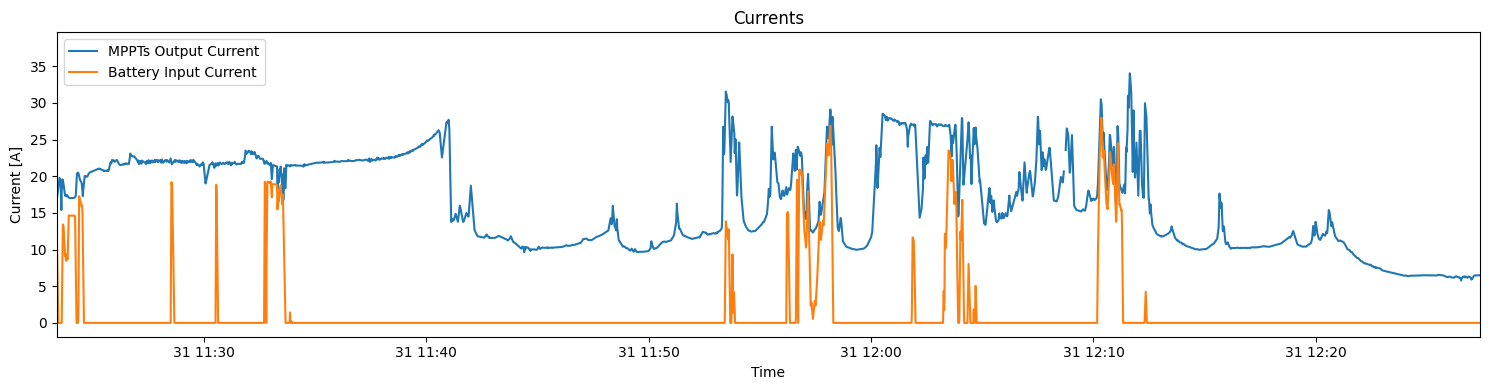

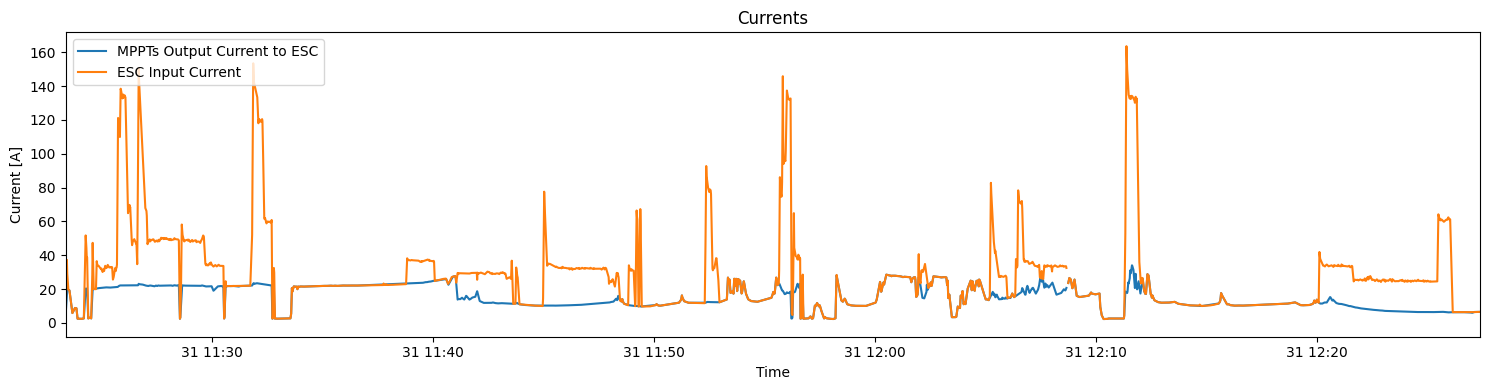

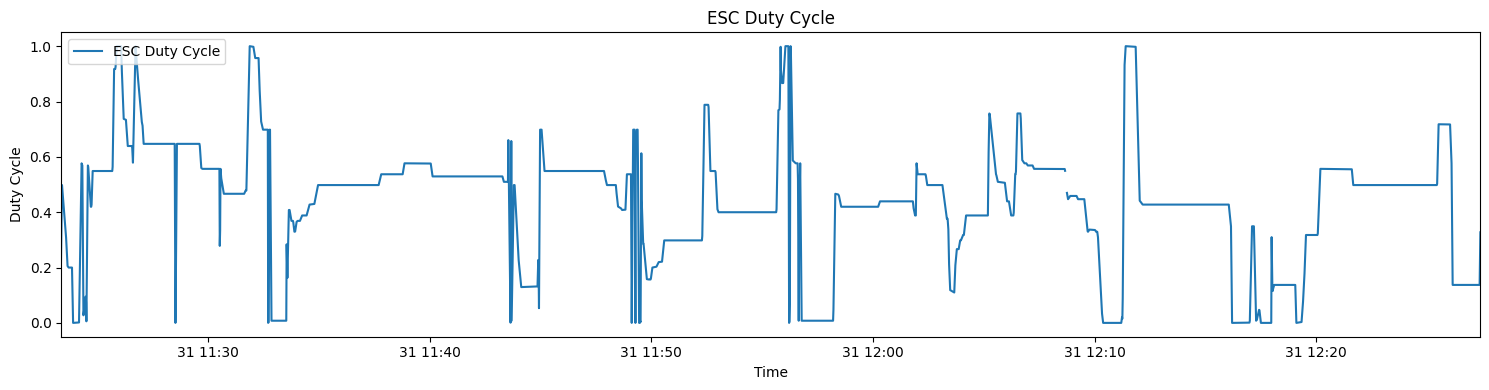

In [54]:
plt.figure(figsize=(15,4))
plt.title('Currents')
plt.plot(df.index, df[system_data['MPPTs Output Current']], label='MPPTs Output Current')
plt.plot(df.index, df[system_data['Battery Input Current']], label='Battery Input Current')
plt.xlim([start, end])
plt.xlabel('Time')
plt.ylabel('Current [A]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,4))
plt.title('Currents')
plt.plot(df.index, df[system_data['MPPTs Output Current']] - df[system_data['Battery Input Current']], label='MPPTs Output Current to ESC')
plt.plot(df.index, df[system_data['Battery Output Current']] - df[system_data['Battery Input Current']] + df[system_data['MPPTs Output Current']], label='ESC Input Current')
plt.xlim([start, end])
plt.xlabel('Time')
plt.ylabel('Current [A]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,4))
plt.title('ESC Duty Cycle')
plt.plot(df.index, df[system_data['ESC Duty Cycle']], label='ESC Duty Cycle')
plt.xlim([start, end])
plt.xlabel('Time')
plt.ylabel('Duty Cycle')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

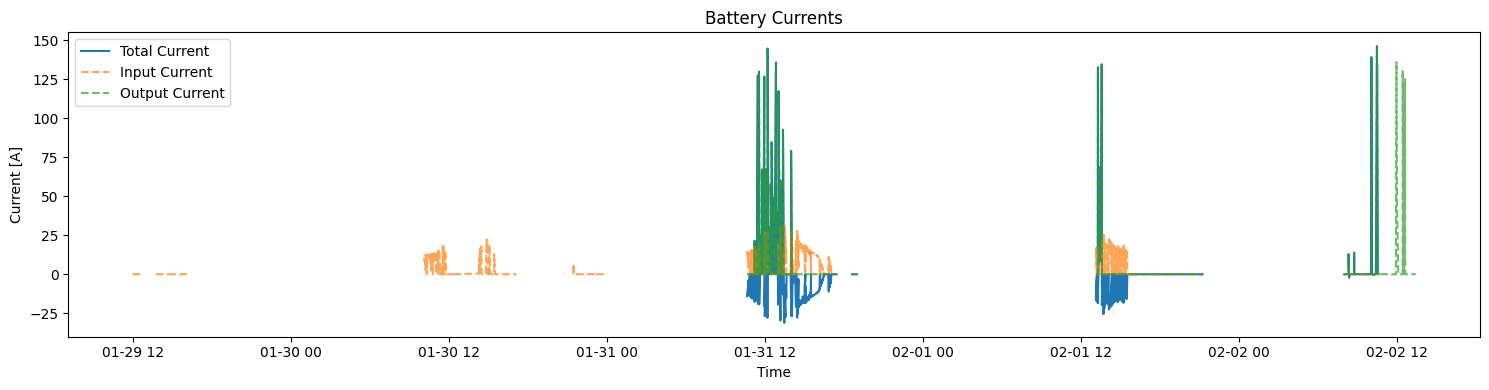

In [55]:
system_data['Battery Current'] = 'Battery Current'
df[system_data['Battery Current']] = df[system_data["Battery Output Current"]] - df[system_data["Battery Input Current"]]

plt.figure(figsize=(15,4))
plt.title('Battery Currents')
plt.plot(df.index, df[system_data['Battery Current']], label='Total Current')
plt.plot(df.index, df[system_data['Battery Input Current']], '--', alpha=0.7, label='Input Current')
plt.plot(df.index, df[system_data['Battery Output Current']], '--', alpha=0.7, label='Output Current')
plt.xlabel('Time')
plt.ylabel('Current [A]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Battery Power

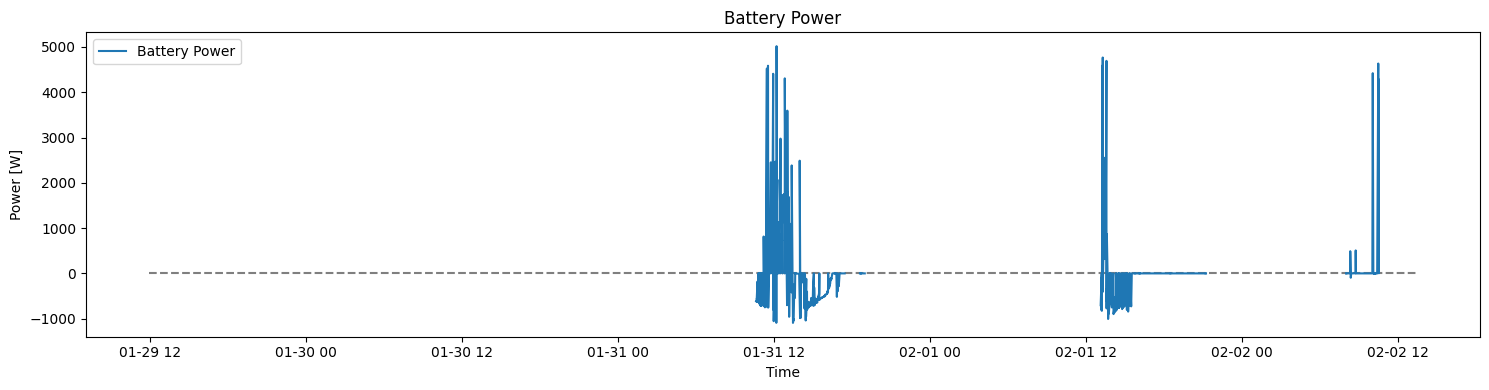

In [56]:
system_data['Battery Power'] = 'Battery Power'
df[system_data['Battery Power']] = df[system_data["Battery Current"]] * df[system_data["Battery Pack Voltage"]]

plt.figure(figsize=(15,4))
plt.title('Battery Power')
plt.hlines([0], xmin=df.index[0], xmax=df.index[-1], linestyle='--', color='black', alpha=0.5)
plt.plot(df.index, df[system_data['Battery Power']], label='Battery Power')
plt.xlabel('Time')
plt.ylabel('Power [W]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

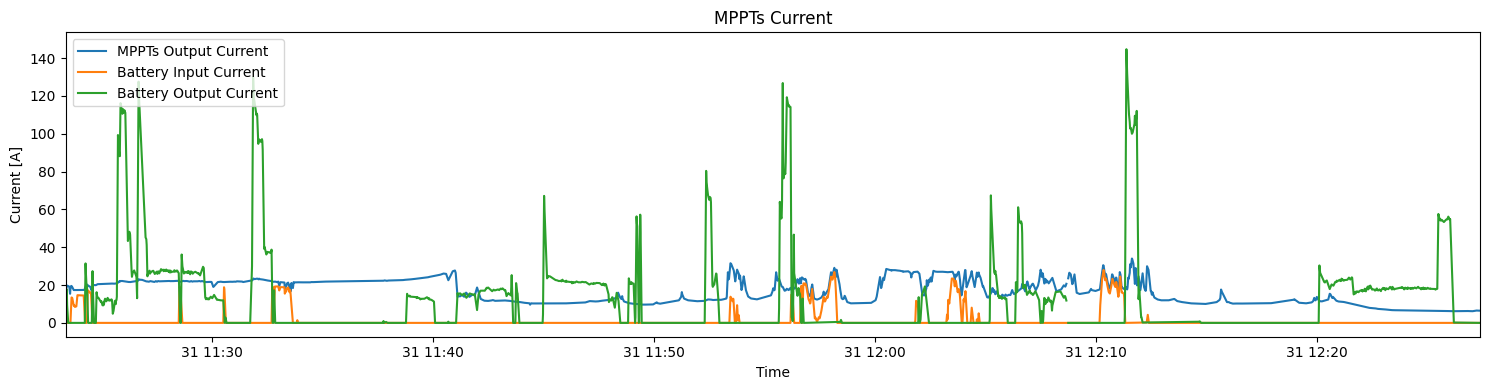

In [57]:
plt.figure(figsize=(15,4))
plt.title('MPPTs Current')
plt.plot(df.index, df[system_data['MPPTs Output Current']], label='MPPTs Output Current')
plt.plot(df.index, df[system_data['Battery Input Current']], label='Battery Input Current')
plt.plot(df.index, df[system_data['Battery Output Current']], label='Battery Output Current')
plt.xlim([start, end])
plt.xlabel('Time')
plt.ylabel('Current [A]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### ESC Input Current
$$
I_{ESC,input}(t) = I_{Batt}(t) + I_{MPPTs,output}(t) - I_{others,input}(t)
$$

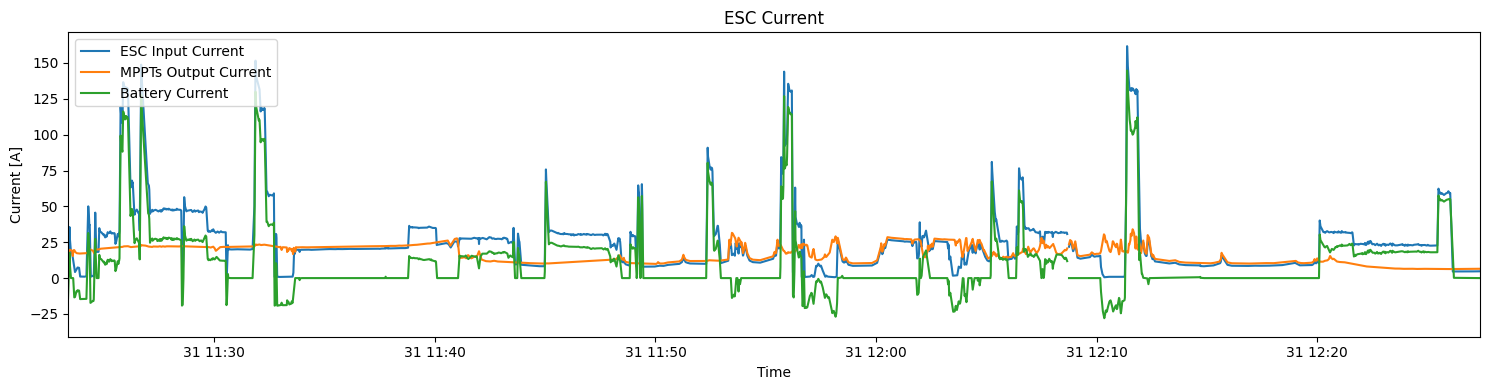

In [58]:
Po_others = 18 * 3.5
Pi_others = Po_others / 0.96
Ii_others = (Pi_others / df[system_data['Battery Pack Voltage']])

system_data['ESC Input Current'] = 'MAM19__COMPUTED__INPUT__CURRENT'
df[system_data['ESC Input Current']] = df[system_data['Battery Current']] + df[system_data['MPPTs Output Current']] - Ii_others

plt.figure(figsize=(15,4))
plt.title('ESC Current')
plt.plot(df.index, df[system_data['ESC Input Current']], label='ESC Input Current')
plt.plot(df.index, df[system_data['MPPTs Output Current']], label='MPPTs Output Current')
plt.plot(df.index, df[system_data['Battery Current']], label='Battery Current')
plt.xlim([start, end])
plt.xlabel('Time')
plt.ylabel('Current [A]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

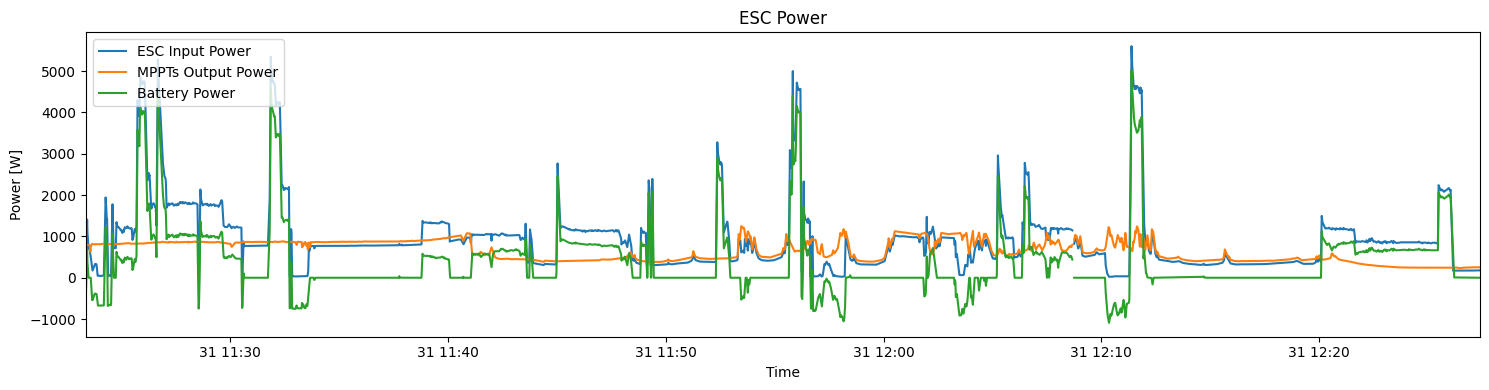

In [59]:
system_data['ESC Input Power'] = 'MAM19__COMPUTED__INPUT__POWER'
df[system_data['ESC Input Power']] = df[system_data['ESC Input Current']] * df[system_data['Battery Pack Voltage']]

plt.figure(figsize=(15,4))
plt.title('ESC Power')
plt.plot(df.index, df[system_data['ESC Input Power']], label='ESC Input Power')
plt.plot(df.index, df[system_data['MPPTs Output Power']], label='MPPTs Output Power')
plt.plot(df.index, df[system_data['Battery Power']], label='Battery Power')
plt.xlim([start, end])
plt.xlabel('Time')
plt.ylabel('Power [W]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Motor Angular Speed

The sensor gives the data in RPM, we want it in rad/s

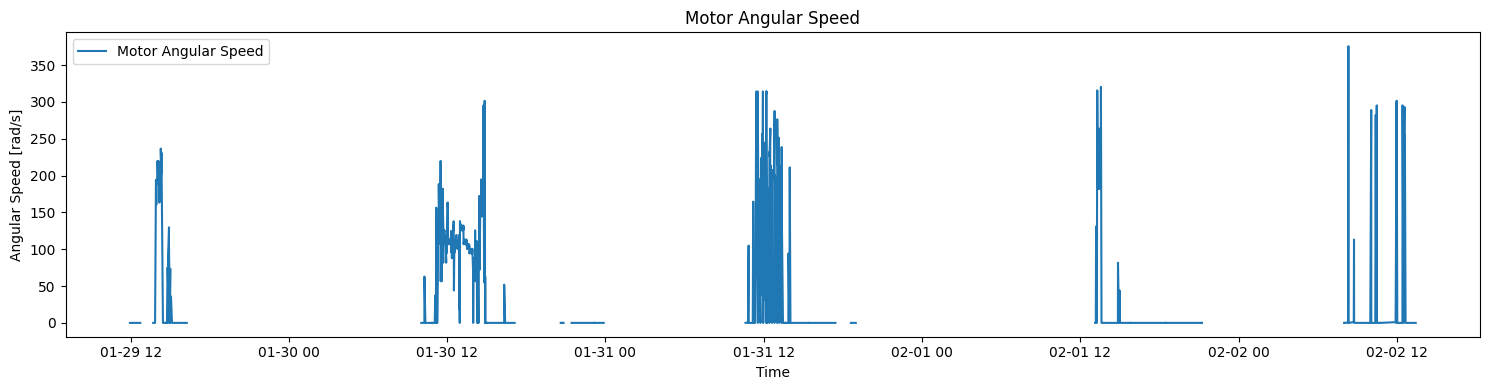

In [60]:
df[system_data['Motor Angular Speed']] *= 2*np.pi/60

plt.figure(figsize=(15,4))
plt.title('Motor Angular Speed')
plt.plot(df.index, df[system_data['Motor Angular Speed']], label='Motor Angular Speed')
plt.xlabel('Time')
plt.ylabel('Angular Speed [rad/s]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

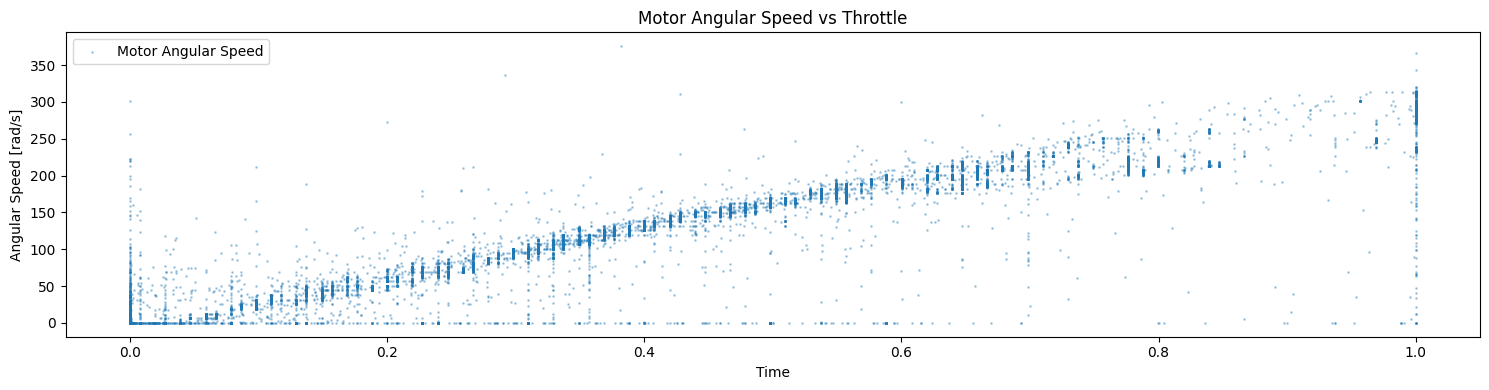

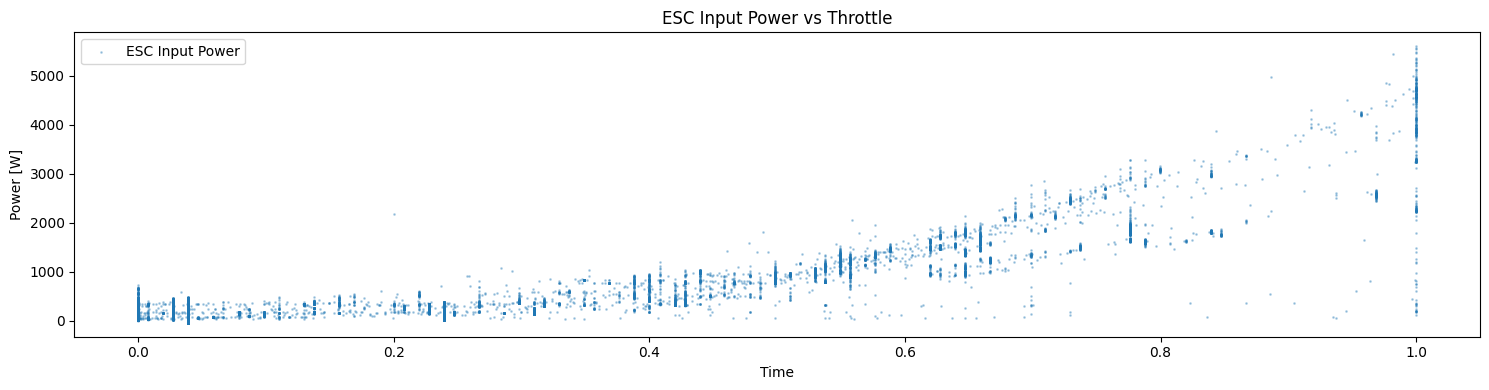

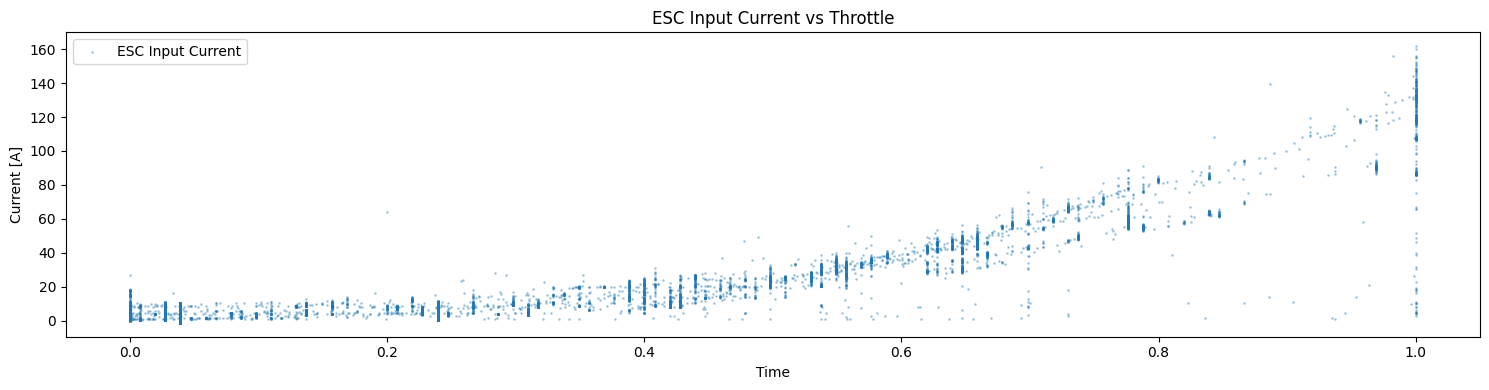

In [61]:
plt.figure(figsize=(15,4))
plt.title('Motor Angular Speed vs Throttle')
plt.scatter(df[system_data['ESC Duty Cycle']], df[system_data['Motor Angular Speed']], label='Motor Angular Speed', s=1, alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Angular Speed [rad/s]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,4))
plt.title('ESC Input Power vs Throttle')
plt.scatter(df[system_data['ESC Duty Cycle']], df[system_data['ESC Input Power']], label='ESC Input Power', s=1, alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Power [W]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,4))
plt.title('ESC Input Current vs Throttle')
plt.scatter(df[system_data['ESC Duty Cycle']], df[system_data['ESC Input Current']], label='ESC Input Current', s=1, alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Current [A]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Construct and save the new dataset


In [62]:
df.columns.to_list()

['MCC19_1__MEASUREMENTS__SIGNATURE',
 'MCC19_1__MEASUREMENTS__OUTPUT_VOLTAGE',
 'MCC19_1__MEASUREMENTS__INPUT_CURRENT',
 'MCC19_1__MEASUREMENTS__INPUT_VOLTAGE',
 'MCC19_1__MEASUREMENTS__DT',
 'MCB19_2__MEASUREMENTS__SIGNATURE',
 'MCB19_2__MEASUREMENTS__OUTPUT_VOLTAGE',
 'MCB19_2__MEASUREMENTS__OUTPUT_CURRENT',
 'MCB19_2__MEASUREMENTS__INPUT_VOLTAGE',
 'MCB19_2__MEASUREMENTS__DT',
 'MCC19_3__MEASUREMENTS__SIGNATURE',
 'MCC19_3__MEASUREMENTS__OUTPUT_VOLTAGE',
 'MCC19_3__MEASUREMENTS__INPUT_CURRENT',
 'MCC19_3__MEASUREMENTS__INPUT_VOLTAGE',
 'MCC19_3__MEASUREMENTS__DT',
 'MIC19__MOTOR__SIGNATURE',
 'MIC19__MOTOR__MOTOR',
 'MIC19__MOTOR__D',
 'MIC19__MOTOR__I',
 'MIC19__MCS__SIGNATURE',
 'MIC19__MCS__BOAT_ON',
 'MIC19__PUMPS__SIGNATURE',
 'MIC19__PUMPS__PUMPS',
 'MCC19_4__MEASUREMENTS__SIGNATURE',
 'MCC19_4__MEASUREMENTS__OUTPUT_VOLTAGE',
 'MCC19_4__MEASUREMENTS__INPUT_CURRENT',
 'MCC19_4__MEASUREMENTS__INPUT_VOLTAGE',
 'MCC19_4__MEASUREMENTS__DT',
 'MSWI19__MCS__SIGNATURE',
 'MSWI19__MCS_

In [63]:
df_new = pd.DataFrame()
df_new.index= df.index

exclude = ['Battery Cell Voltage', 'Battery Input Current', 'Battery Output Current']

for key,value in system_data.items():
    if key in exclude:
        continue

    if isinstance(value, str):
        df_new[key] = df[value]
        continue

    if isinstance(value, list):
        words = key.split(' ')
        for i,v in enumerate(value):
            words_copy = words.copy()
            words_copy.insert(1, str(i+1))
            key = ' '.join(words_copy)

            df_new[key] = df[v]

# Add solcast data:
df_new['Air Temperature'] = df['solcast_AirTemp']
df_new['Solar POA'] = df['solcast_poa']
df_new['Wind Speed'] = df['solcast_WindSpeed10m']
df_new['Wind Direction'] = df['solcast_WindDirection10m']

df_new.columns

# Save
df_new.to_csv("../models/2020/boat_data_1s.csv")
# df_new.to_csv("../models/2020/boat_data_100ms.csv")

# Exploring the Data


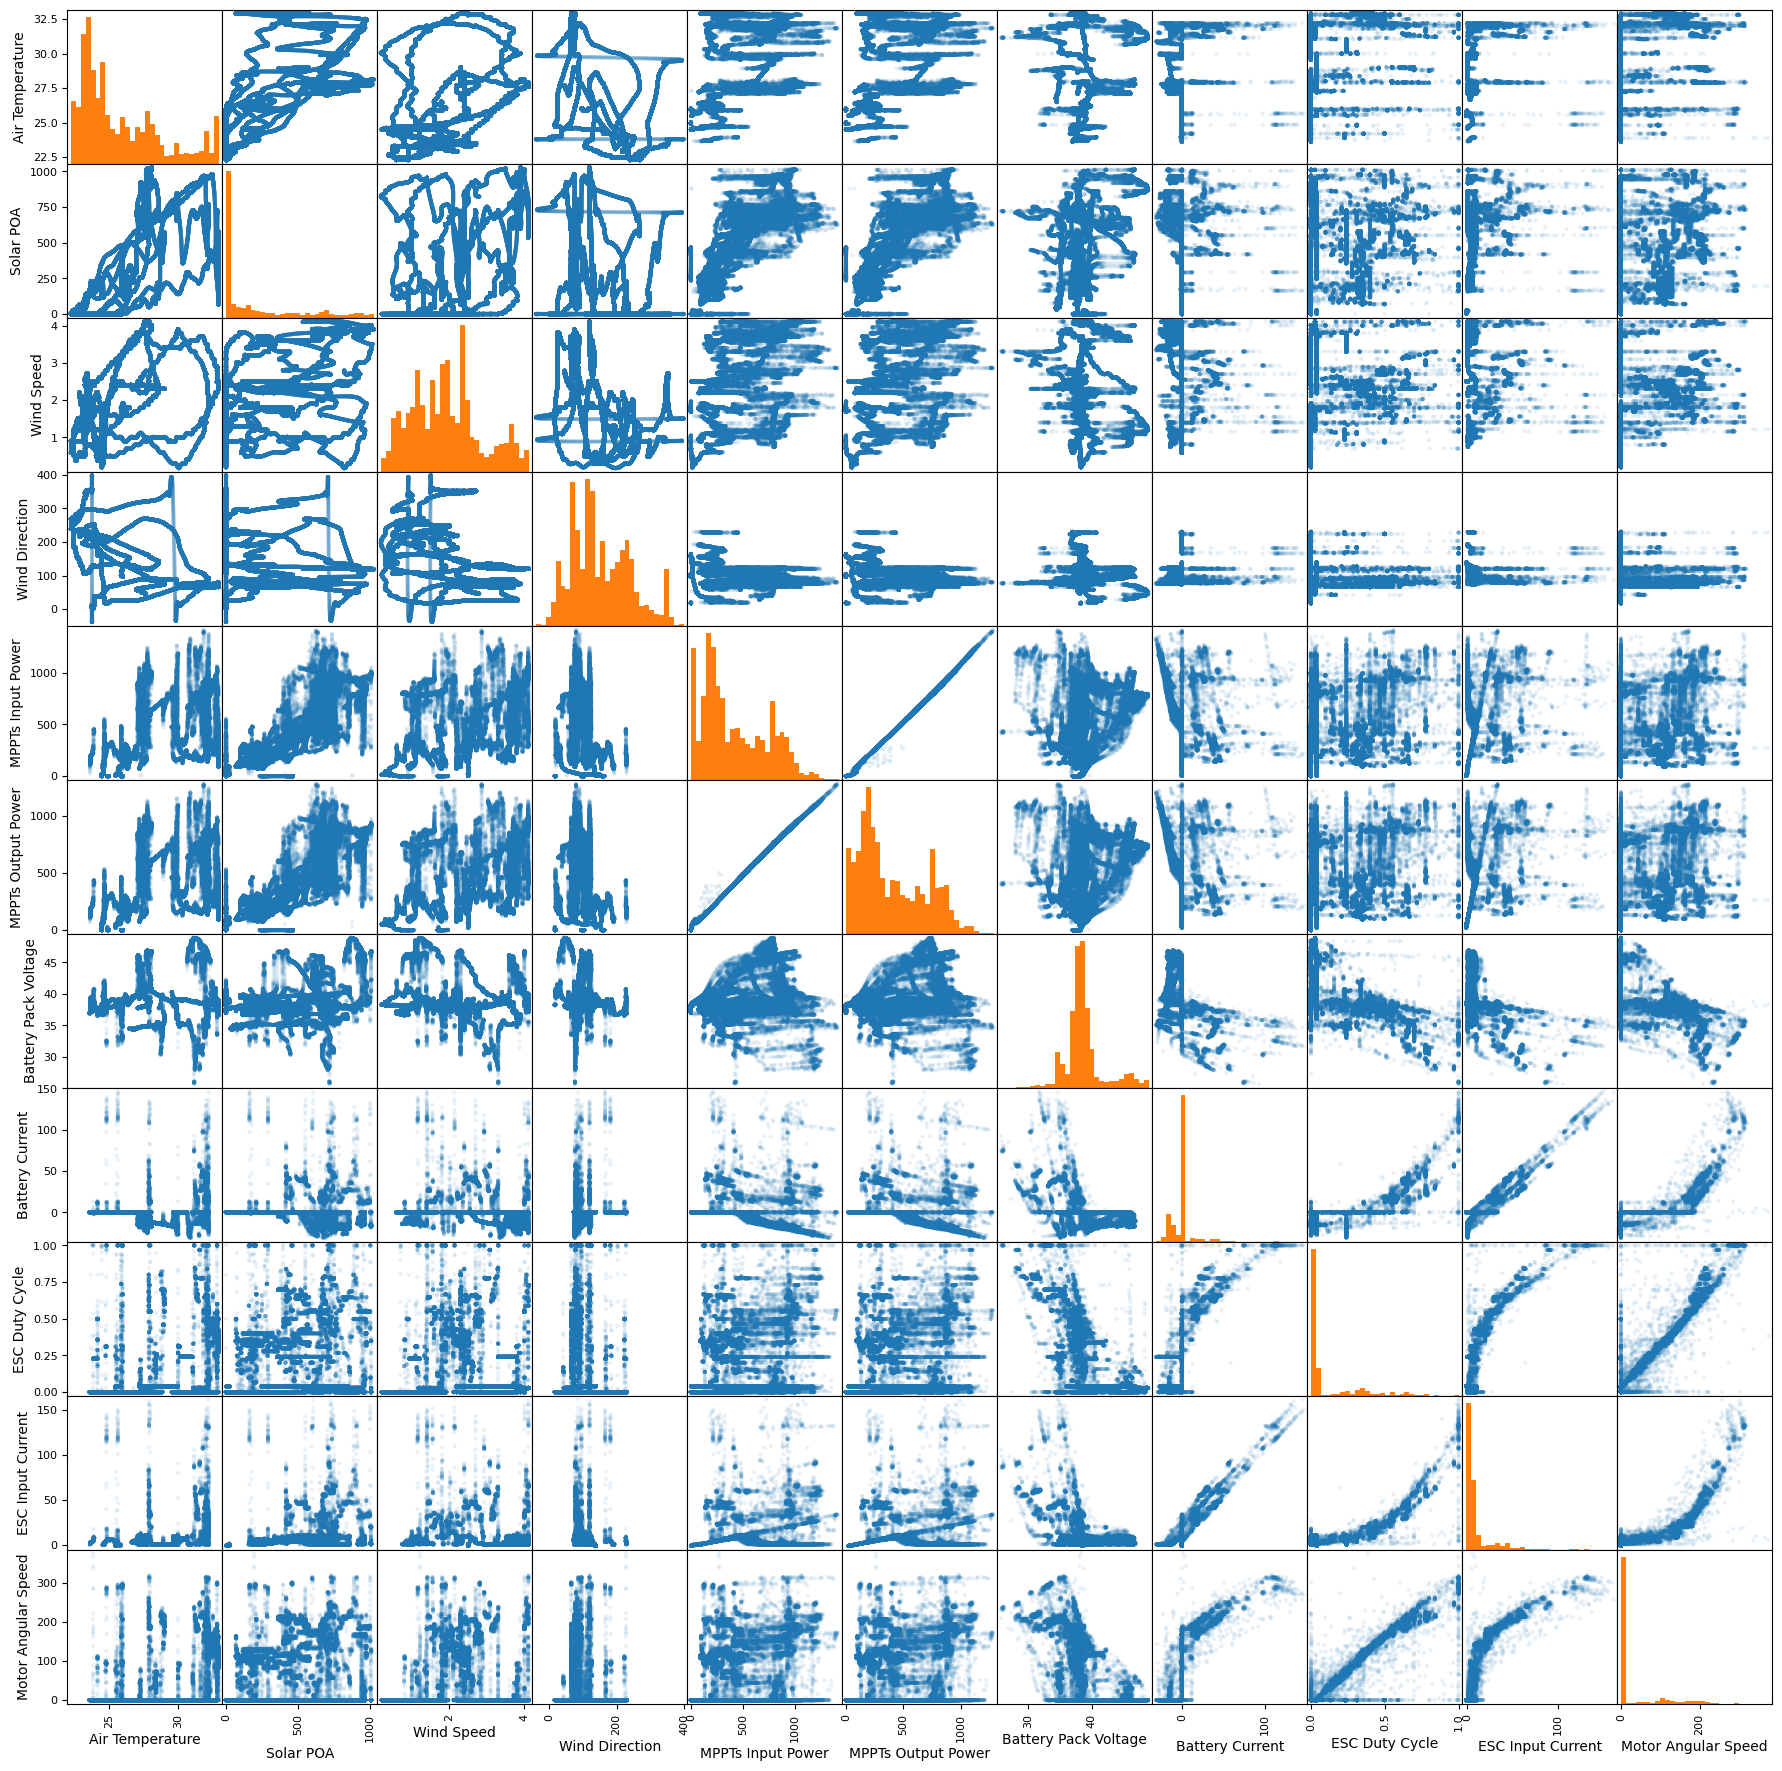

In [64]:
from pandas.plotting import scatter_matrix

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

df = df_new

cols = [
    'Air Temperature',
    'Solar POA',
    'Wind Speed',
    'Wind Direction',
    'MPPTs Input Power',
    'MPPTs Output Power',
    'Battery Pack Voltage',
    'Battery Current',
    'ESC Duty Cycle',
    'ESC Input Current',
    'Motor Angular Speed',
]
scatter_matrix(df[cols], figsize=(2*len(cols), 2*len(cols)), alpha=0.1, hist_kwds={'bins':30, 'color':colors[1]})
plt.show()


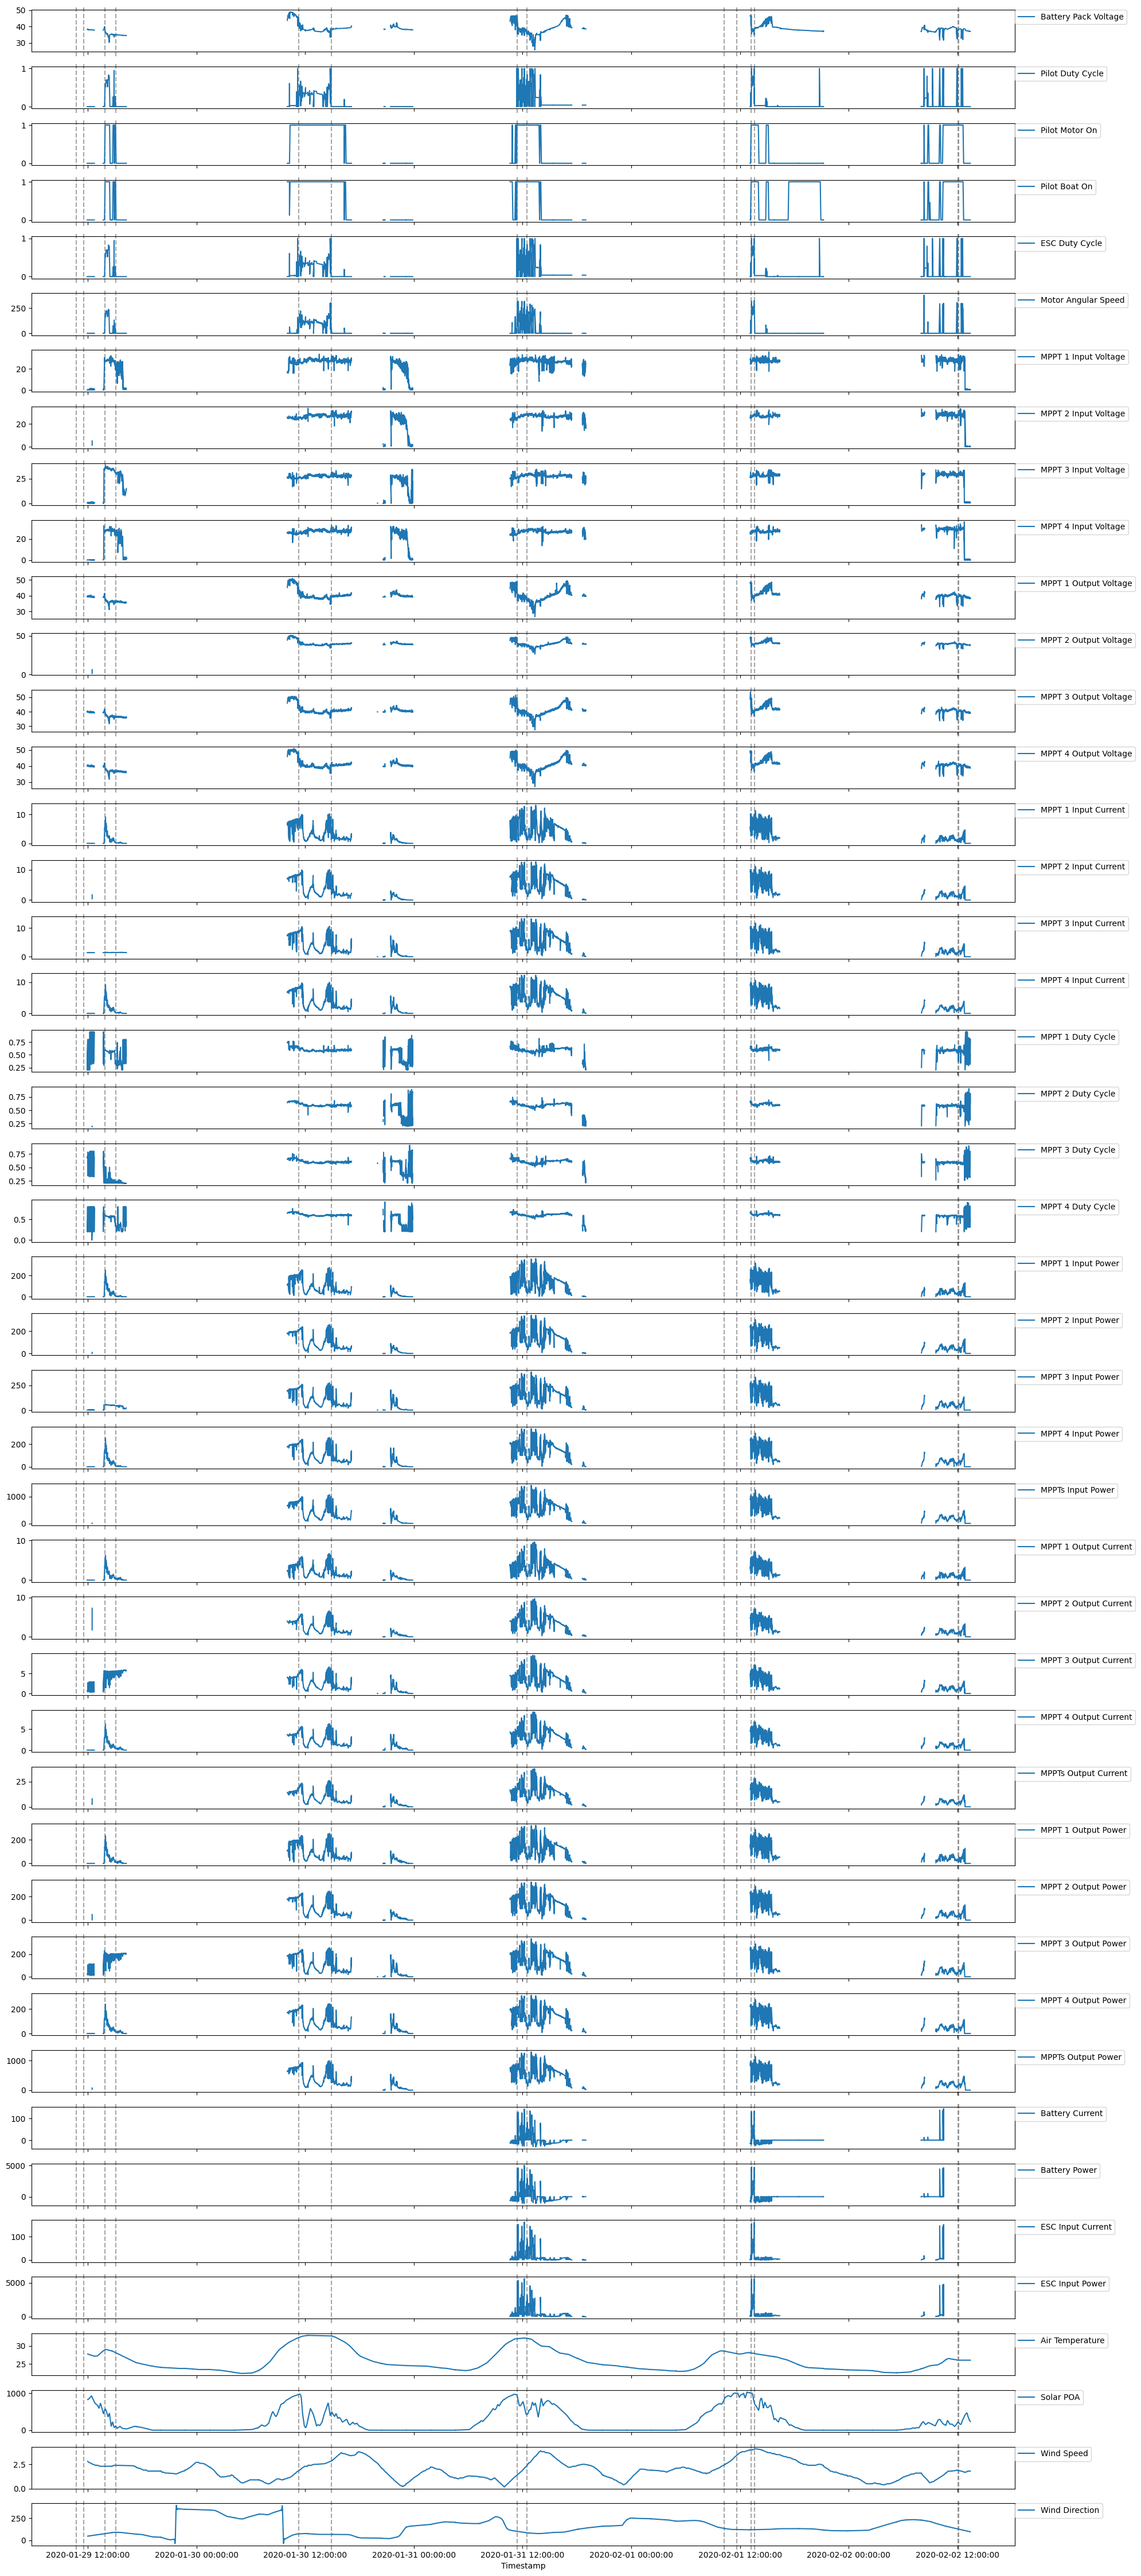

In [65]:
from matplotlib.dates import DateFormatter

columns = df.columns

fig, ax = plt.subplots(len(columns), 1, figsize=(20, 1 * len(columns)), sharex=True)

# Plot each column
for i, column in enumerate(columns):
    ax[i].plot(df.index, df[column], label=column.replace('__', '\n'), zorder=1)
    ax[i].legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)

    # Plot vertical lines for each event
    for event in events.index:
        start, end = events.loc[event]
        ax[i].axvline(start, ymin=-0.1, ymax=1.1, linestyle='--', color='gray', alpha=0.7, zorder=0, clip_on=False)
        ax[i].axvline(end, ymin=-0.1, ymax=1.1, linestyle='--', color='gray', alpha=0.7, zorder=0, clip_on=False)

        if i == 0:
            ax[i].annotate(event, xy=(end, 1.02), xytext=(start, 1.1),
                           arrowprops=dict(facecolor='black', arrowstyle='->'))

# Configure X axis
plt.xlabel('Timestamp')
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M:%S', tz=tzinfo))

plt.tight_layout()
# plt.savefig('../')
plt.show()

In [66]:
import vaex
import matplotlib.pyplot as plt

df = vaex.from_csv("../models/2020/boat_data_1s.csv").to_pandas_df()
# df = vaex.from_csv("../models/2020/boat_data_100ms.csv").to_pandas_df()
df["timestamp"] = pd.DatetimeIndex(df["timestamp"])
df = df.set_index("timestamp")
df = df.interpolate(method="time")
df = df.resample('1s').ffill()
df = df.dropna()
df.describe().T

count        mean         std          min  \
Battery Pack Voltage   182908.0   39.763200    3.136784    25.710004   
Pilot Duty Cycle       182908.0    0.044736    0.131978     0.000000   
Pilot Motor On         182908.0    0.127032    0.332970     0.000000   
Pilot Boat On          182908.0    0.201342    0.400957     0.000000   
ESC Duty Cycle         182908.0    0.044736    0.131978     0.000000   
Motor Angular Speed    182908.0    8.907854   39.894903     0.000000   
MPPT 1 Input Voltage   182908.0   27.987149    3.798186     0.001897   
MPPT 2 Input Voltage   182908.0   25.623481    5.069822     0.000769   
MPPT 3 Input Voltage   182908.0   28.348288    4.027565     0.514984   
MPPT 4 Input Voltage   182908.0   26.613793    4.750623     0.000000   
MPPT 1 Output Voltage  182908.0   41.164781    3.039570    26.754072   
MPPT 2 Output Voltage  182908.0   40.701934    2.938290    26.475760   
MPPT 3 Output Voltage  182908.0   42.040800    2.995677    27.251461   
MPPT 4 Output Voltage  182908.0   41.887391    2.926768    27.109080   
MPPT 1 Input Current   182908.0    2.520077    2.280724     0.000000   
MPPT 2 Input Current   182908.0    3.285713    2.857928     0.000000   
MPPT 3 Input Current   182908.0    3.462017    3.050483     0.000000   
MPPT 4 Input Current   182908.0    3.166365    2.815465     0.000000   
MPPT 1 Duty Cycle      182908.0    0.470930    0.128348     0.201961   
MPPT 2 Duty Cycle      182908.0    0.469014    0.132552     0.204362   
MPPT 3 Duty Cycle      182908.0    0.506159    0.105581     0.209961   
MPPT 4 Duty Cycle      182908.0    0.473697    0.131804     0.199961   
MPPT 1 Input Power     182908.0   70.310125   61.304505     0.000000   
MPPT 2 Input Power     182908.0   86.469311   73.908481     0.000000   
MPPT 3 Input Power     182908.0   95.465581   81.927972     0.000000   
MPPT 4 Input Power     182908.0   84.523114   73.214800     0.000000   
MPPTs Input Power      182908.0  336.768846  286.414249     0.000000   
MPPT 1 Output Current  182908.0    1.624773    1.351145     0.000000   
MPPT 2 Output Current  182908.0    2.018735    1.555789     0.000000   
MPPT 3 Output Current  182908.0    2.021341    1.591677     0.000000   
MPPT 4 Output Current  182908.0    1.915671    1.496416     0.000000   
MPPTs Output Current   182908.0    7.580536    5.911121     0.000000   
MPPT 1 Output Power    182908.0   69.843151   56.186093     0.000000   
MPPT 2 Output Power    182908.0   86.677577   67.372212     0.000000   
MPPT 3 Output Power    182908.0   89.586122   71.180406     0.000000   
MPPT 4 Output Power    182908.0   84.557771   66.579515     0.000000   
MPPTs Output Power     182908.0  330.665240  257.805247     0.000000   
Battery Current        182908.0   -2.918801    9.423660   -31.234375   
Battery Power          182908.0 -140.863997  361.025617 -1092.661812   
ESC Input Current      182908.0    3.067339    9.328629    -1.264972   
ESC Input Power        182908.0  115.644905  322.305832   -48.664613   
Air Temperature        182908.0   25.482852    2.540855    22.489220   
Solar POA              182908.0  249.821966  322.126982    -0.250537   
Wind Speed             182908.0    2.030600    0.970612     0.379347   
Wind Direction         182908.0  153.725529   51.914569    73.812261   

                                25%         50%         75%          max  
Battery Pack Voltage   3.715736e+01   38.881545   42.047749    46.902877  
Pilot Duty Cycle       0.000000e+00    0.005854    0.030456     1.000000  
Pilot Motor On         0.000000e+00    0.000000    0.000000     1.000000  
Pilot Boat On          0.000000e+00    0.000000    0.000000     1.000000  
ESC Duty Cycle         0.000000e+00    0.005854    0.030456     1.000000  
Motor Angular Speed    0.000000e+00    0.000000    0.000000   375.734500  
MPPT 1 Input Voltage   2.682065e+01   28.153017   29.832828    36.315742  
MPPT 2 Input Voltage   2.274588e+01   26.765490   28.895207    33.570164  
MPPT 3 Input Voltage   2.654431e+01   

[1.44921373e-04 6.65039148e+01]


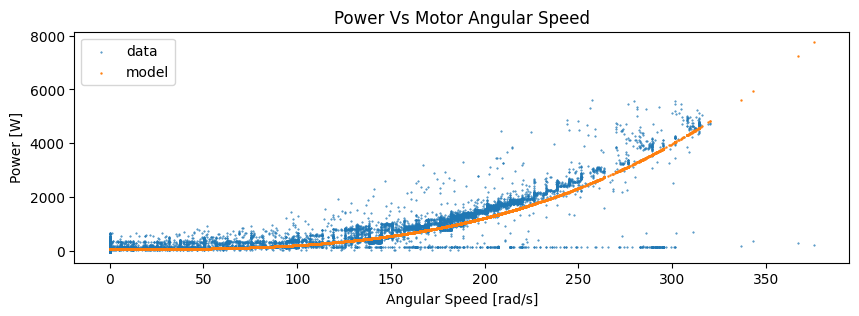

In [67]:
from scipy.optimize import curve_fit

def esc_input_power_from_motor_angular_speed(x, a, b):
    return a*x**3 + b

popt, _ = curve_fit(esc_input_power_from_motor_angular_speed, df['Motor Angular Speed'].to_numpy(), df["ESC Input Power"].to_numpy())
print(popt)

pred = esc_input_power_from_motor_angular_speed(df['Motor Angular Speed'].to_numpy(), *popt)

plt.figure(figsize=(10,3))
plt.title('Power Vs Motor Angular Speed')
plt.scatter(df['Motor Angular Speed'], df['ESC Input Power'], label='data', s=0.2)
plt.scatter(df['Motor Angular Speed'], pred, label='model', s=0.5)
plt.xlabel('Angular Speed [rad/s]')
plt.ylabel('Power [W]')
plt.legend()
plt.show()

[3536.48240097   71.0739956 ]


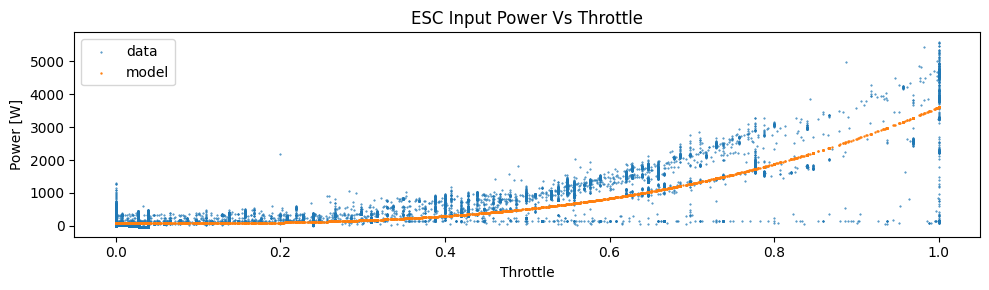

In [68]:
def esc_input_power_from_esc_duty_cycle(x, a, b):
    return a*x**3 + b

popt, _ = curve_fit(esc_input_power_from_esc_duty_cycle, df['ESC Duty Cycle'].to_numpy(), df["ESC Input Power"].to_numpy())
print(popt)

pred = esc_input_power_from_esc_duty_cycle(df['ESC Duty Cycle'].to_numpy(), *popt)

plt.figure(figsize=(10,3))
plt.title('ESC Input Power Vs Throttle')
plt.scatter(df['ESC Duty Cycle'], df['ESC Input Power'], label='data', s=0.2)
plt.scatter(df['ESC Duty Cycle'], pred, label='model', s=0.5)
plt.xlabel('Throttle')
plt.ylabel('Power [W]')
plt.legend()
plt.tight_layout()
plt.show()

[276.28981787]


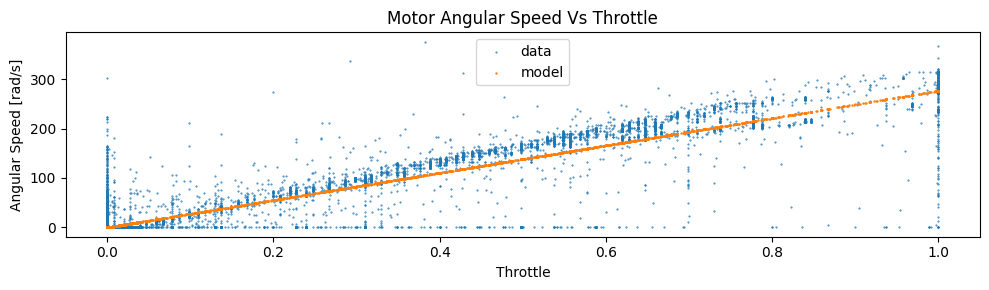

In [69]:
def motor_angular_speped_from_esc_duty_cycle(x, a):
    return a*x

popt, _ = curve_fit(motor_angular_speped_from_esc_duty_cycle, df['ESC Duty Cycle'].to_numpy(), df["Motor Angular Speed"].to_numpy())
print(popt)

pred = motor_angular_speped_from_esc_duty_cycle(df['ESC Duty Cycle'].to_numpy(), *popt)

plt.figure(figsize=(10,3))
plt.title('Motor Angular Speed Vs Throttle')
plt.scatter(df['ESC Duty Cycle'], df['Motor Angular Speed'], label='data', s=0.2)
plt.scatter(df['ESC Duty Cycle'], pred, label='model', s=0.5)
plt.xlabel('Throttle')
plt.ylabel('Angular Speed [rad/s]')
plt.legend()
plt.tight_layout()
plt.show()

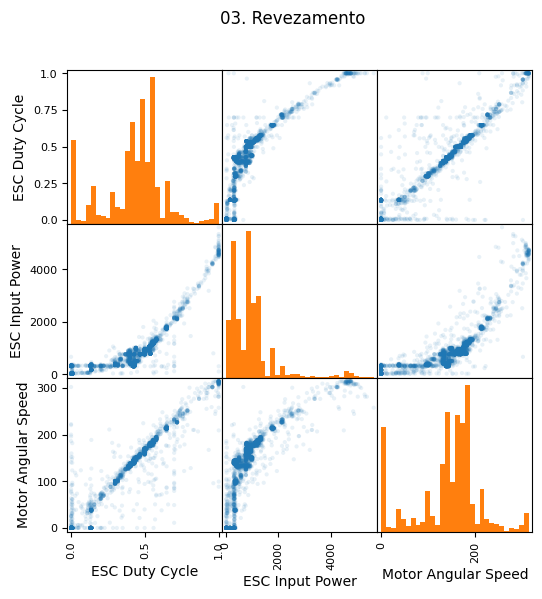

/home/joaoantoniocardoso/workspace_TCC/repo_2022_2/.env/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/joaoantoniocardoso/workspace_TCC/repo_2022_2/.env/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/joaoantoniocardoso/workspace_TCC/repo_2022_2/.env/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


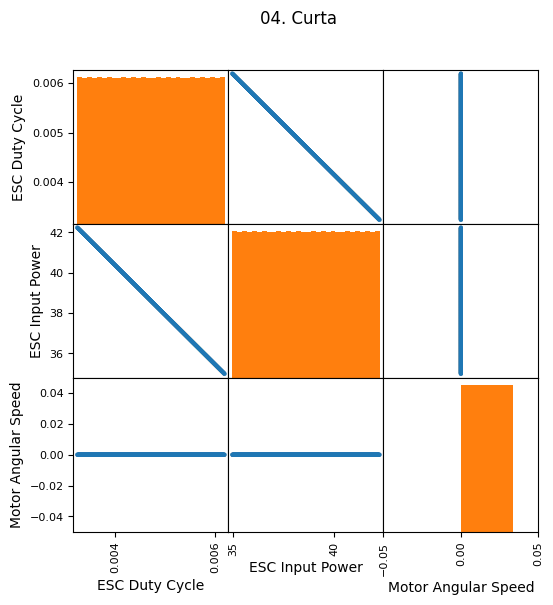

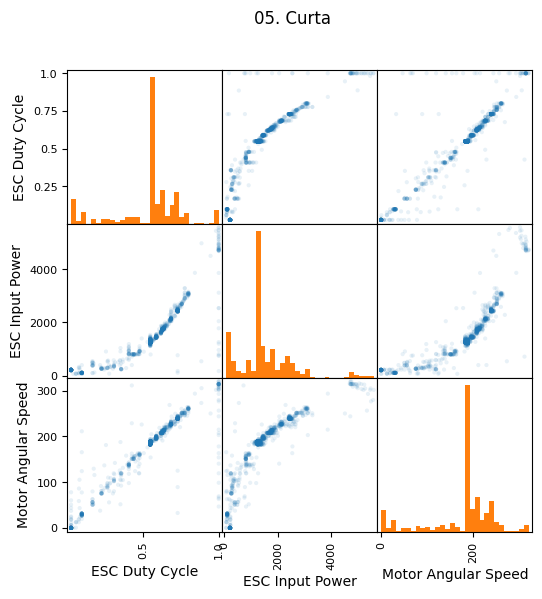

/home/joaoantoniocardoso/workspace_TCC/repo_2022_2/.env/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/home/joaoantoniocardoso/workspace_TCC/repo_2022_2/.env/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/joaoantoniocardoso/workspace_TCC/repo_2022_2/.env/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/joaoantoniocardoso/workspace_TCC/repo_2022_2/.env/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:116: RuntimeWarning: invalid value encountered in di

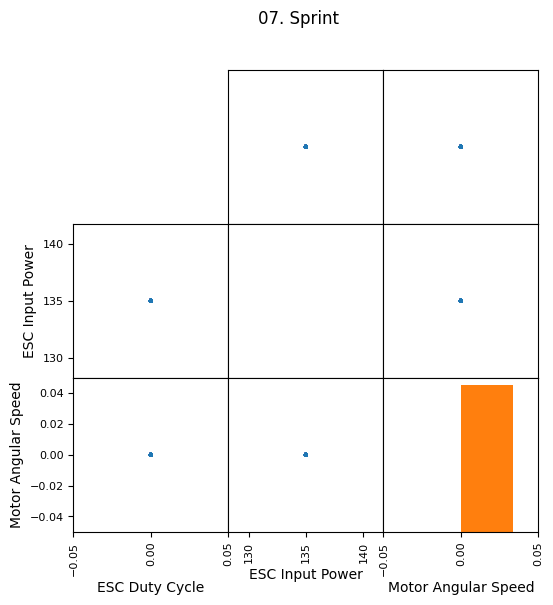

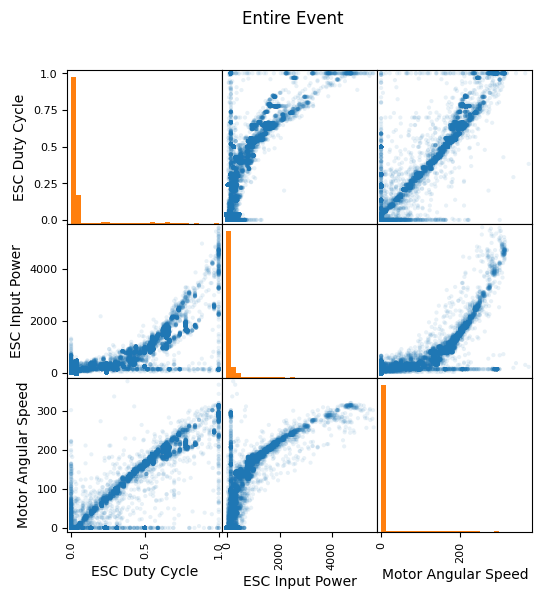

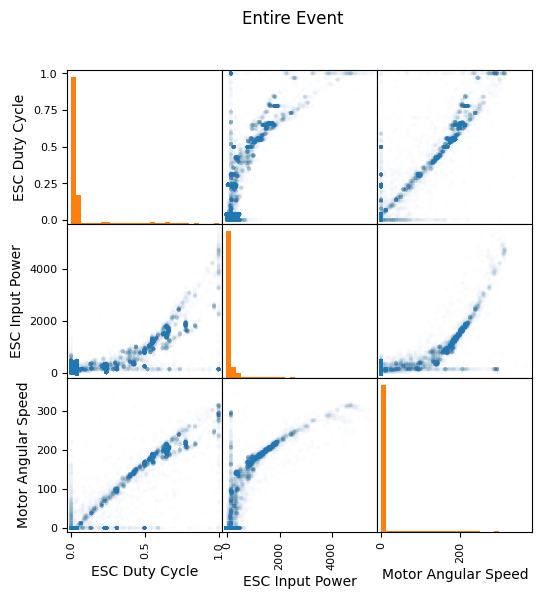

In [70]:
from pandas.plotting import scatter_matrix

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

cols = [
    'ESC Duty Cycle',
    'ESC Input Power',
    'Motor Angular Speed',
]

for event in events.index:
    start, end = events.loc[event]

    data = df.loc[(df.index >= start) & (df.index <= end), cols].dropna()
    if data.count().all() > 0:
        scatter_matrix(data, figsize=(2*len(cols), 2*len(cols)), alpha=0.1, hist_kwds={'bins':30, 'color':colors[1]})
        plt.suptitle(f'{event}')
        plt.show()

scatter_matrix(df.dropna()[cols], figsize=(2*len(cols), 2*len(cols)), alpha=0.1, hist_kwds={'bins':30, 'color':colors[1]})
plt.suptitle('Entire Event')
plt.show()

scatter_matrix(df.dropna()[cols], figsize=(2*len(cols), 2*len(cols)), alpha=0.01, hist_kwds={'bins':30, 'color':colors[1]})
plt.suptitle('Entire Event')
plt.show()